In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import math

In [2]:
#!pip install openpyexcel

# Step 0 - Exploring dataset

In [3]:
df = pd.read_excel("Flourishing_248_HD - Copy.xlsx")
df

ID  age  education  sex  famstatus  pro_cat  pro_quant  priv_cat  \
0    344   72          6    2          2        3         82         3   
1    317   45          6    2          2        3         81         3   
2    444   43          5    1          1        3         79         3   
3    270   60          2    2          3        3         79         3   
4     52   49          2    2          2        3         77         3   
..   ...  ...        ...  ...        ...      ...        ...       ...   
243  242   37          6    1          3        1         22         2   
244  318   31          6    2          3        1         21         2   
245  502   29          6    2          1        1         39         1   
246   98   59          5    1          2        1         31         1   
247   26   39          3    2          3        1         43         3   

     priv_quant  positivity  flow  
0            83    4.142857    44  
1            83    4.000000    44  
2            78    5.000000    47  
3            82    4.666667    42  
4            73    2.285714    33  
..          ...         ...   ...  
243          43    1.650000    21  
244          35    0.384615    21  
245          25    0.527778    33  
246          28    0.585366    26  
247          63    1.125000    34  

[248 rows x 11 columns]

In [4]:
df.describe(include="all")

ID         age   education         sex   famstatus     pro_cat  \
count  248.000000  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   245.201613   41.685484    4.616935    1.608871    2.536290    2.052419   
std    155.254472   10.154568    1.538453    0.488990    0.757348    0.597967   
min      1.000000   20.000000    1.000000    1.000000    1.000000    1.000000   
25%    107.500000   34.000000    3.000000    1.000000    2.000000    2.000000   
50%    229.000000   40.000000    5.000000    2.000000    3.000000    2.000000   
75%    387.500000   49.000000    6.000000    2.000000    3.000000    2.000000   
max    513.000000   72.000000    6.000000    2.000000    3.000000    3.000000   

        pro_quant    priv_cat  priv_quant  positivity        flow  
count  248.000000  248.000000  248.000000  248.000000  248.000000  
mean    50.612903    2.225806   55.987903    1.812982   32.951613  
std     13.431614    0.537481   11.613367    0.803469    6.599417  
min     21.000000    1.000000   23.000000    0.384615   13.000000  
25%     41.000000    2.000000   48.000000    1.272727   29.000000  
50%     50.000000    2.000000   56.000000    1.720000   33.000000  
75%     61.000000    3.000000   64.000000    2.170455   37.000000  
max     82.000000    3.000000   83.000000    5.000000   48.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          248 non-null    int64  
 1   age         248 non-null    int64  
 2   education   248 non-null    int64  
 3   sex         248 non-null    int64  
 4   famstatus   248 non-null    int64  
 5   pro_cat     248 non-null    int64  
 6   pro_quant   248 non-null    int64  
 7   priv_cat    248 non-null    int64  
 8   priv_quant  248 non-null    int64  
 9   positivity  248 non-null    float64
 10  flow        248 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


In [6]:
to_change=[ 'sex', 'famstatus', 'pro_cat', 
       'priv_cat']
for i in to_change:
    df[i]=df[i].astype("category")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          248 non-null    int64   
 1   age         248 non-null    int64   
 2   education   248 non-null    int64   
 3   sex         248 non-null    category
 4   famstatus   248 non-null    category
 5   pro_cat     248 non-null    category
 6   pro_quant   248 non-null    int64   
 7   priv_cat    248 non-null    category
 8   priv_quant  248 non-null    int64   
 9   positivity  248 non-null    float64 
 10  flow        248 non-null    int64   
dtypes: category(4), float64(1), int64(6)
memory usage: 15.2 KB


In [8]:
df.describe(include="category")

sex  famstatus  pro_cat  priv_cat
count   248        248      248       248
unique    2          3        3         3
top       2          3        2         2
freq    151        173      159       164

In [9]:
df.isnull().sum()

ID            0
age           0
education     0
sex           0
famstatus     0
pro_cat       0
pro_quant     0
priv_cat      0
priv_quant    0
positivity    0
flow          0
dtype: int64

In [10]:
df.replace({"sex":{1:"male",2:"female"},"famstatus":{1 : "Single",2 : "Separate / Divorced",3 : "Couple"},"pro_cat" : {1:"Languishing", 2:"Moderately Mentally Healthy", 3:"Flourishing"},"priv_cat":{1:"Languishing",2:"Moderately Mentally Healthy",3:"Flourishing"}}, inplace=True)
df




ID  age  education     sex            famstatus      pro_cat  pro_quant  \
0    344   72          6  female  Separate / Divorced  Flourishing         82   
1    317   45          6  female  Separate / Divorced  Flourishing         81   
2    444   43          5    male               Single  Flourishing         79   
3    270   60          2  female               Couple  Flourishing         79   
4     52   49          2  female  Separate / Divorced  Flourishing         77   
..   ...  ...        ...     ...                  ...          ...        ...   
243  242   37          6    male               Couple  Languishing         22   
244  318   31          6  female               Couple  Languishing         21   
245  502   29          6  female               Single  Languishing         39   
246   98   59          5    male  Separate / Divorced  Languishing         31   
247   26   39          3  female               Couple  Languishing         43   

                        priv_cat  priv_quant  positivity  flow  
0                    Flourishing          83    4.142857    44  
1                    Flourishing          83    4.000000    44  
2                    Flourishing          78    5.000000    47  
3                    Flourishing          82    4.666667    42  
4                    Flourishing          73    2.285714    33  
..                           ...         ...         ...   ...  
243  Moderately Mentally Healthy          43    1.650000    21  
244  Moderately Mentally Healthy          35    0.384615    21  
245                  Languishing          25    0.527778    33  
246                  Languishing          28    0.585366    26  
247                  Flourishing          63    1.125000    34  

[248 rows x 11 columns]

In [11]:
"""
Teacher's method:
df.loc[df["positivity"]>3, "pos_cat"]=4
df.loc[(df["positivity"]>2) & (df["positivity"]<=3), "pos_cat"]=3
df.loc[(df["positivity"]>1) & (df["positivity"]<=2), "pos_cat"]=2
df.loc[df["positivity"]<=1, "pos_cat"]=4
df["pos_cat"]=df["pos_cat"].astype("category")
"""

'\nTeacher\'s method:\ndf.loc[df["positivity"]>3, "pos_cat"]=4\ndf.loc[(df["positivity"]>2) & (df["positivity"]<=3), "pos_cat"]=3\ndf.loc[(df["positivity"]>1) & (df["positivity"]<=2), "pos_cat"]=2\ndf.loc[df["positivity"]<=1, "pos_cat"]=4\ndf["pos_cat"]=df["pos_cat"].astype("category")\n'

In [12]:
old_bins=[0,1,2,3,5]
new_bins=["depressed","languishing","moderately emotionally healthy","flourishing"]
df["positivity_label"]=pd.cut(df["positivity"],bins=old_bins,labels=new_bins).astype("category")

In [13]:
df.head()

ID  age  education     sex            famstatus      pro_cat  pro_quant  \
0  344   72          6  female  Separate / Divorced  Flourishing         82   
1  317   45          6  female  Separate / Divorced  Flourishing         81   
2  444   43          5    male               Single  Flourishing         79   
3  270   60          2  female               Couple  Flourishing         79   
4   52   49          2  female  Separate / Divorced  Flourishing         77   

      priv_cat  priv_quant  positivity  flow                positivity_label  
0  Flourishing          83    4.142857    44                     flourishing  
1  Flourishing          83    4.000000    44                     flourishing  
2  Flourishing          78    5.000000    47                     flourishing  
3  Flourishing          82    4.666667    42                     flourishing  
4  Flourishing          73    2.285714    33  moderately emotionally healthy

In [14]:
df.columns

Index(['ID', 'age', 'education', 'sex', 'famstatus', 'pro_cat', 'pro_quant',
       'priv_cat', 'priv_quant', 'positivity', 'flow', 'positivity_label'],
      dtype='object')

In [15]:
for i, column in enumerate(list(df.columns)):
    print(i, column)

0 ID
1 age
2 education
3 sex
4 famstatus
5 pro_cat
6 pro_quant
7 priv_cat
8 priv_quant
9 positivity
10 flow
11 positivity_label


In [16]:
df.head()

ID  age  education     sex            famstatus      pro_cat  pro_quant  \
0  344   72          6  female  Separate / Divorced  Flourishing         82   
1  317   45          6  female  Separate / Divorced  Flourishing         81   
2  444   43          5    male               Single  Flourishing         79   
3  270   60          2  female               Couple  Flourishing         79   
4   52   49          2  female  Separate / Divorced  Flourishing         77   

      priv_cat  priv_quant  positivity  flow                positivity_label  
0  Flourishing          83    4.142857    44                     flourishing  
1  Flourishing          83    4.000000    44                     flourishing  
2  Flourishing          78    5.000000    47                     flourishing  
3  Flourishing          82    4.666667    42                     flourishing  
4  Flourishing          73    2.285714    33  moderately emotionally healthy

In [17]:
df.nunique()

ID                  248
age                  44
education             6
sex                   2
famstatus             3
pro_cat               3
pro_quant            58
priv_cat              3
priv_quant           52
positivity          192
flow                 33
positivity_label      4
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                248 non-null    int64   
 1   age               248 non-null    int64   
 2   education         248 non-null    int64   
 3   sex               248 non-null    category
 4   famstatus         248 non-null    category
 5   pro_cat           248 non-null    category
 6   pro_quant         248 non-null    int64   
 7   priv_cat          248 non-null    category
 8   priv_quant        248 non-null    int64   
 9   positivity        248 non-null    float64 
 10  flow              248 non-null    int64   
 11  positivity_label  248 non-null    category
dtypes: category(5), float64(1), int64(6)
memory usage: 15.6 KB


In [93]:
num_cols=[]
for i in df.columns:
    if i!="ID" and df[i].dtype!="category":
        num_cols.append(i)
num_cols

['age', 'education', 'pro_quant', 'priv_quant', 'positivity', 'flow']

In [94]:
cat_cols=[]
for i in df.columns:
    if df[i].dtype=="category":
        cat_cols.append(i)
cat_cols

['sex', 'famstatus', 'pro_cat', 'priv_cat', 'positivity_label']

# Step 1 - Univariate Data Analysis
1.	If the variables are categorical.

1.1.	Generate the summary table of each variable.

1.2.	Plot their Pie Chart

1.3.	Plot their Bar Chart

2.	If the variables are quantitative.

2.1.	Plot their histogram

2.2.	Plot their boxplot


In [19]:
def univ_cat(column,title):
    
    fig, ax = plt.subplots(1,2, figsize=(8, 3))
    
    ax[0].bar(column.value_counts().index,column.value_counts())
    ax[0].set_title(title)
    ax[1].pie(column.value_counts(),labels=column.value_counts().index, autopct='%1.1f%%')
    ax[1].set_title(title)
    
    plt.tight_layout()
    plt.show()

def univ_num(column,title):
    fig, ax = plt.subplots(1,2, figsize=(8, 3))
    ax[0].hist(column, bins=15, edgecolor='gray', color='skyblue')
    ax[0].set_title(title)
    ax[1].boxplot(column)
    ax[1].set_title(title)
    
    plt.tight_layout()
    plt.show()

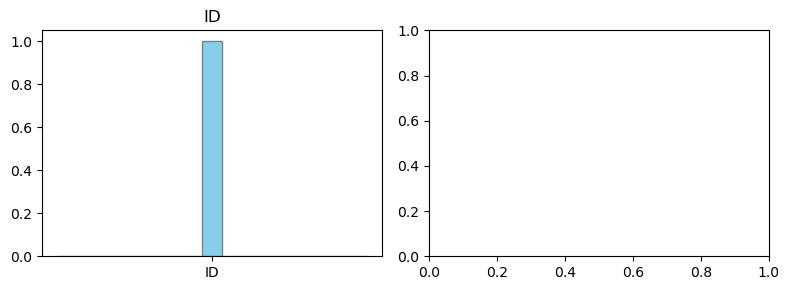

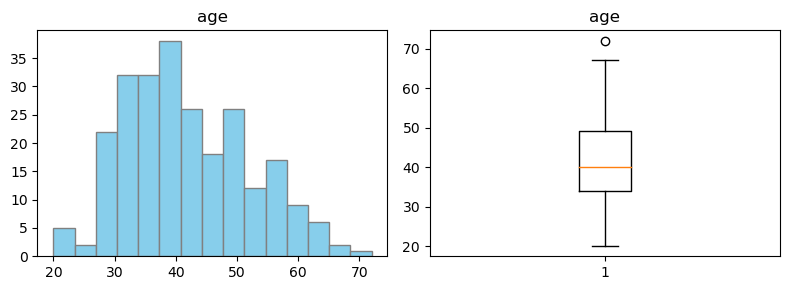

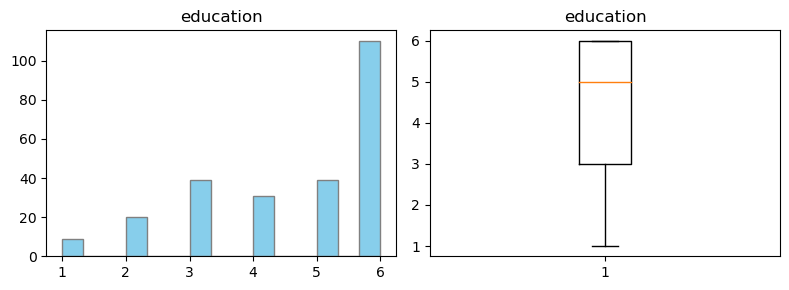

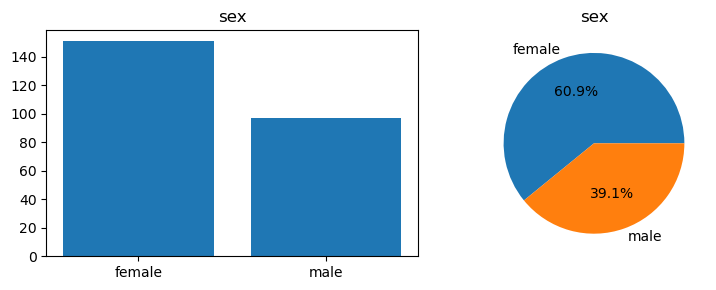

'Now, value_counts() for sex:'

female    151
male       97
Name: sex, dtype: int64

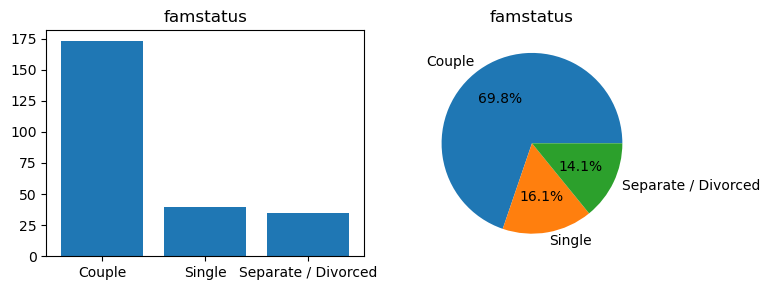

'Now, value_counts() for famstatus:'

Couple                 173
Single                  40
Separate / Divorced     35
Name: famstatus, dtype: int64

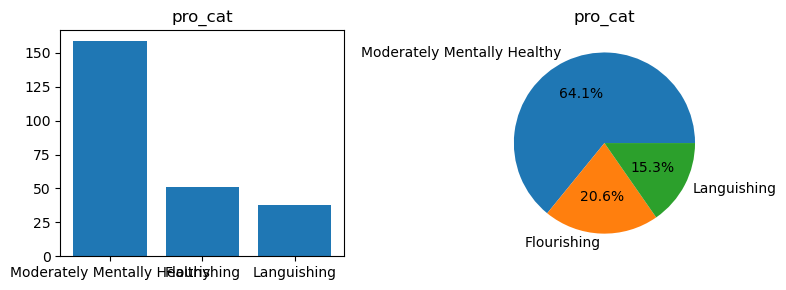

'Now, value_counts() for pro_cat:'

Moderately Mentally Healthy    159
Flourishing                     51
Languishing                     38
Name: pro_cat, dtype: int64

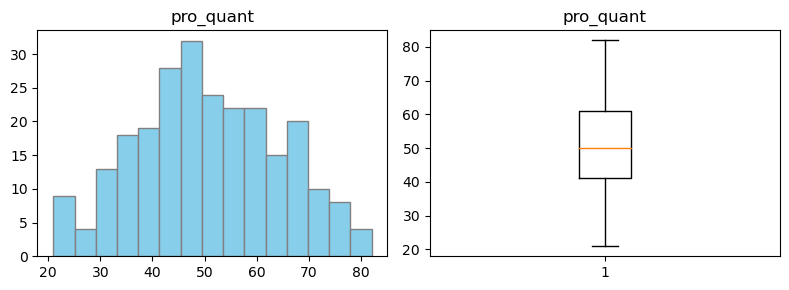

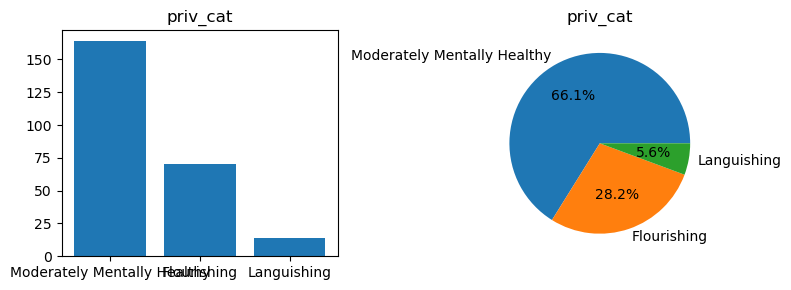

'Now, value_counts() for priv_cat:'

Moderately Mentally Healthy    164
Flourishing                     70
Languishing                     14
Name: priv_cat, dtype: int64

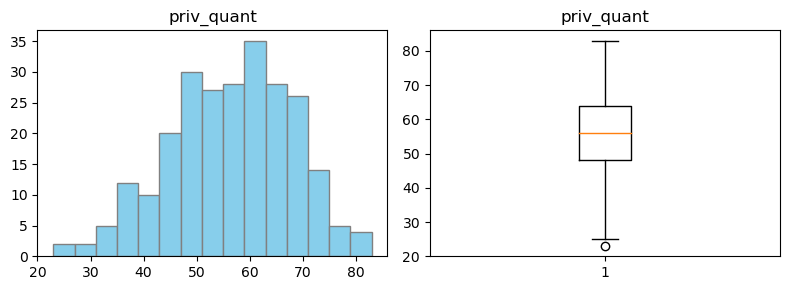

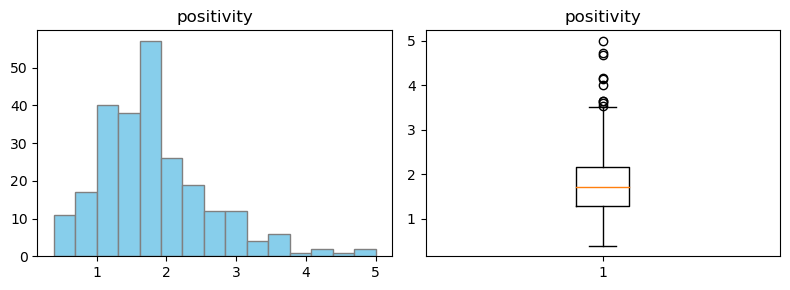

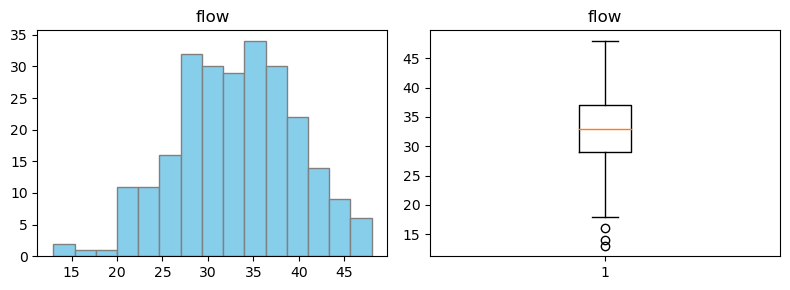

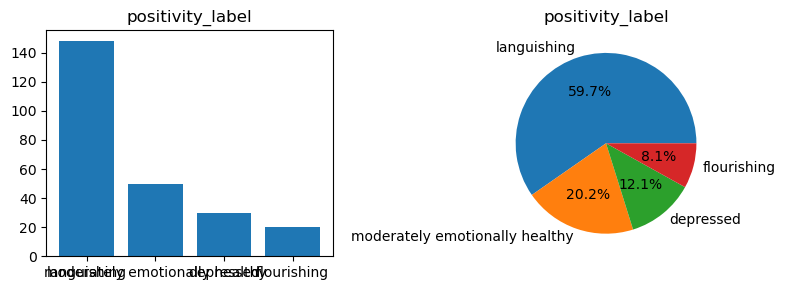

'Now, value_counts() for positivity_label:'

languishing                       148
moderately emotionally healthy     50
depressed                          30
flourishing                        20
Name: positivity_label, dtype: int64

In [20]:
for i, column in enumerate(list(df.columns)):
    if column=="ID":
        fig, ax = plt.subplots(1,2, figsize=(8, 3))
        ax[0].hist(column, bins=15, edgecolor='gray', color='skyblue')
        ax[0].set_title(column)
        plt.tight_layout()
        plt.show()
    
    if column in num_cols:
        univ_num(df[column],column)
        
    if column in cat_cols:
        univ_cat(df[column],column)
        display("Now, value_counts() for "+column+":")
        display(df[column].value_counts())

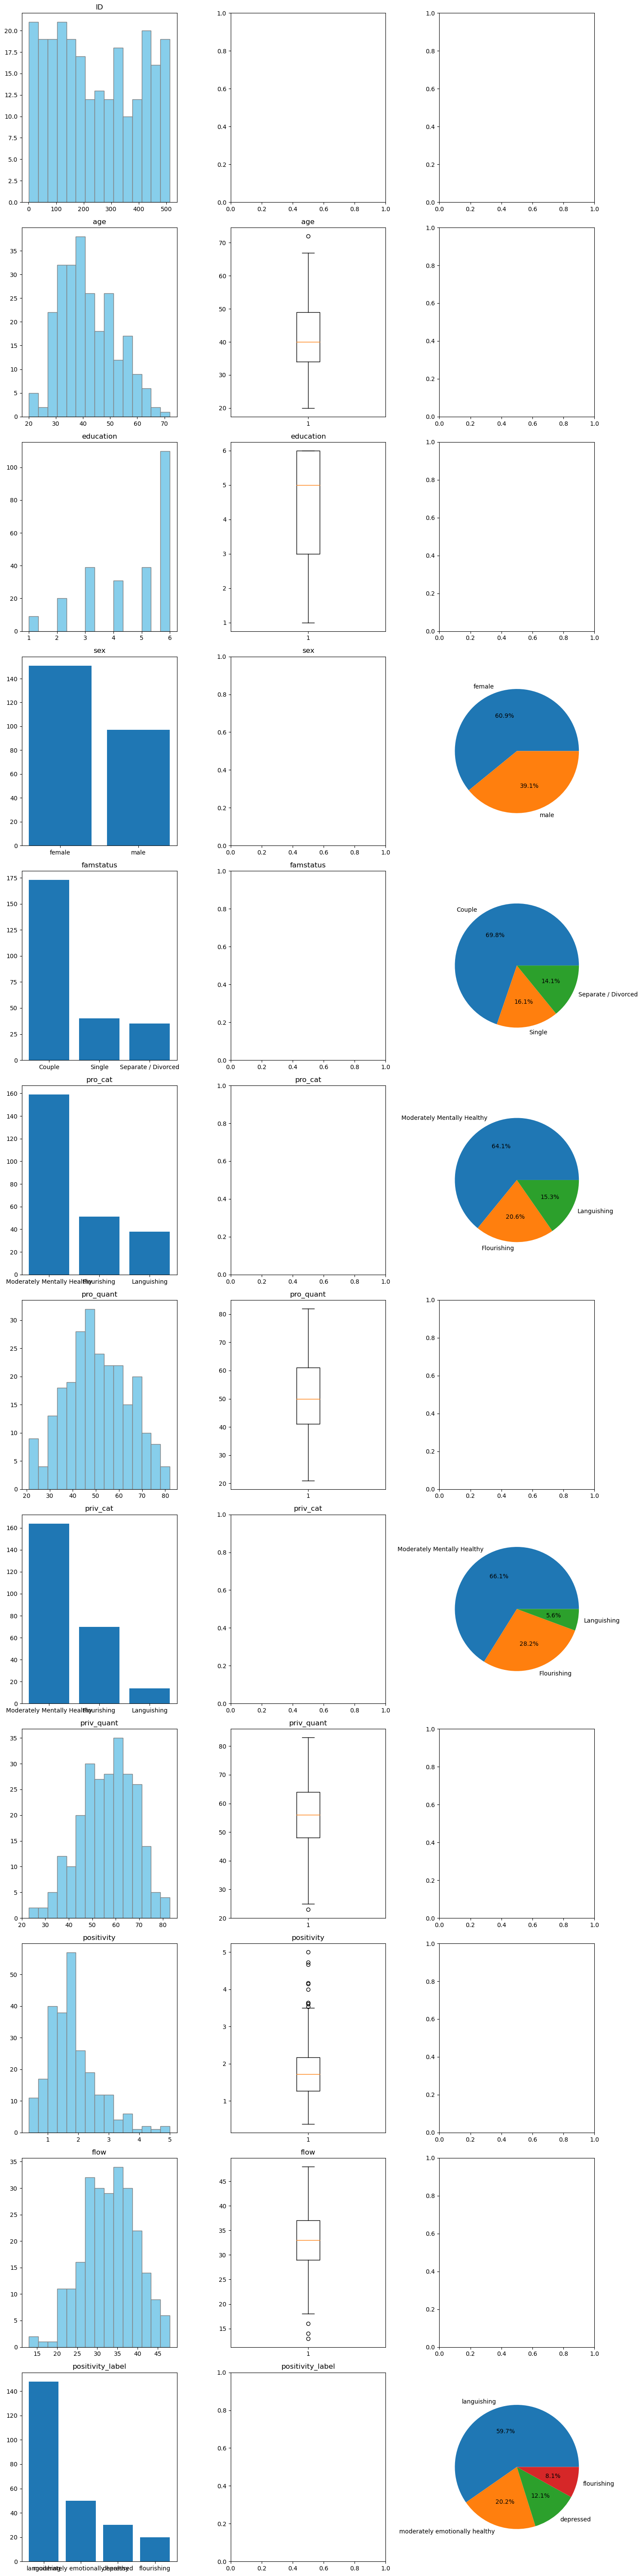

In [21]:

fig, ax = plt.subplots(12,3, figsize=(15, 60))

ax = ax.ravel()

for i, column in enumerate(list(df.columns)):
    if column=="ID":
        ax[i*3].hist(df[column], bins=15, edgecolor='gray', color='skyblue')
        ax[i*3].set_title(column)
    
    elif column in num_cols:
        ax[i*3].hist(df[column], bins=15, edgecolor='gray', color='skyblue')
        ax[i*3].set_title(column)
        ax[i*3+1].boxplot(df[column])
        ax[i*3+1].set_title(column)
        
    elif column in cat_cols:
        ax[i*3].bar(df[column].value_counts().index,df[column].value_counts())
        ax[i*3].set_title(column)
        ax[i*3+2].pie(df[column].value_counts(),labels=df[column].value_counts().index, autopct='%1.1f%%')
        ax[i*3+2].set_title(column)

plt.tight_layout()
plt.show()

# Step 2 – Bivariate Data Analysis

1.	If the variables are both categorical.

1.1.	Generate the contingency table

1.2.	Check the significance of their relationship with the chi-square test & provide Cramer’s V

1.3.	Plot their side-by-side bar charts

1.4.	Plot their stacked bar charts


In [22]:
#n=cont_table.shape[0]*cont_table.shape[1]
#v_cramer=math.sqrt(x2/(n*(min(cont_table.shape)-1-1)))

In [23]:
from scipy.stats import chi2, chi2_contingency
x2_dict={}
temp=[]


for i in cat_cols:
    temp.append(i)
    for j in cat_cols:
        if not(j in temp):
            alpha=0.05
            cont_table=pd.crosstab(df[i],df[j], margins=True)
            display(cont_table)

            x2, pvalue, dof, expected_freq = chi2_contingency(pd.crosstab(df[i],df[j]), correction=False)
            critical_value = chi2.ppf(1 - alpha, df=dof)
            if abs(x2) > critical_value:
                print(
                    f"Reject Ho (variables are NOT likely independant)!\n X2={x2:.04f} C={critical_value:.04f} alpha={alpha:.04f} p-value={pvalue:.04f}"
                )
                conclusion="NOT likely independant"
            
            else:
                print(
                    f"Cannot reject Ho (variables are likely independant)!\n X2={x2:.04f} C={critical_value:.04f} alpha={alpha:.04f} p-value={pvalue:.04f}"
                )
                conclusion="likely independant"
            n=(cont_table.iloc[-1,-1])
            print("n ="+str(n))
            v_cramer=math.sqrt(x2/(n*(min(cont_table.shape)-1-1)))
            print(f"v_cramer={v_cramer}")
            x2_dict[str(i)+" / "+str(j)]={"conclusion":conclusion,"x2":x2,"critical_value":critical_value, "alpha":alpha, "pvalue":pvalue,"v_cramer":v_cramer }

test_df_chi=pd.DataFrame.from_dict(x2_dict)
display(test_df_chi)



famstatus  Single  Separate / Divorced  Couple  All
sex                                                
male           17                    6      74   97
female         23                   29      99  151
All            40                   35     173  248

Reject Ho (variables are NOT likely independant)!
 X2=8.2606 C=5.9915 alpha=0.0500 p-value=0.0161
n =248
v_cramer=0.18250701609307357


pro_cat  Languishing  Moderately Mentally Healthy  Flourishing  All
sex                                                                
male              14                           61           22   97
female            24                           98           29  151
All               38                          159           51  248

Cannot reject Ho (variables are likely independant)!
 X2=0.4665 C=5.9915 alpha=0.0500 p-value=0.7920
n =248
v_cramer=0.04337003608442827


priv_cat  Languishing  Moderately Mentally Healthy  Flourishing  All
sex                                                                 
male                7                           61           29   97
female              7                          103           41  151
All                14                          164           70  248

Cannot reject Ho (variables are likely independant)!
 X2=1.1077 C=5.9915 alpha=0.0500 p-value=0.5747
n =248
v_cramer=0.0668319196998897


positivity_label  depressed  languishing  moderately emotionally healthy  \
sex                                                                        
male                     10           55                              20   
female                   20           93                              30   
All                      30          148                              50   

positivity_label  flourishing  All  
sex                                 
male                       12   97  
female                      8  151  
All                        20  248

Cannot reject Ho (variables are likely independant)!
 X2=4.3377 C=7.8147 alpha=0.0500 p-value=0.2272
n =248
v_cramer=0.1322522301966866


pro_cat              Languishing  Moderately Mentally Healthy  Flourishing  \
famstatus                                                                    
Single                         7                           23           10   
Separate / Divorced            8                           21            6   
Couple                        23                          115           35   
All                           38                          159           51   

pro_cat              All  
famstatus                 
Single                40  
Separate / Divorced   35  
Couple               173  
All                  248

Cannot reject Ho (variables are likely independant)!
 X2=2.9916 C=9.4877 alpha=0.0500 p-value=0.5592
n =248
v_cramer=0.07766301103855333


priv_cat             Languishing  Moderately Mentally Healthy  Flourishing  \
famstatus                                                                    
Single                         6                           25            9   
Separate / Divorced            3                           25            7   
Couple                         5                          114           54   
All                           14                          164           70   

priv_cat             All  
famstatus                 
Single                40  
Separate / Divorced   35  
Couple               173  
All                  248

Reject Ho (variables are NOT likely independant)!
 X2=11.1384 C=9.4877 alpha=0.0500 p-value=0.0251
n =248
v_cramer=0.1498550316524006


positivity_label     depressed  languishing  moderately emotionally healthy  \
famstatus                                                                     
Single                       7           23                               8   
Separate / Divorced          6           21                               5   
Couple                      17          104                              37   
All                         30          148                              50   

positivity_label     flourishing  All  
famstatus                              
Single                         2   40  
Separate / Divorced            3   35  
Couple                        15  173  
All                           20  248

Cannot reject Ho (variables are likely independant)!
 X2=3.7617 C=12.5916 alpha=0.0500 p-value=0.7089
n =248
v_cramer=0.08708601520470528


priv_cat                     Languishing  Moderately Mentally Healthy  \
pro_cat                                                                 
Languishing                            8                           27   
Moderately Mentally Healthy            5                          122   
Flourishing                            1                           15   
All                                   14                          164   

priv_cat                     Flourishing  All  
pro_cat                                        
Languishing                            3   38  
Moderately Mentally Healthy           32  159  
Flourishing                           35   51  
All                                   70  248

Reject Ho (variables are NOT likely independant)!
 X2=70.9596 C=9.4877 alpha=0.0500 p-value=0.0000
n =248
v_cramer=0.3782376839889246


positivity_label             depressed  languishing  \
pro_cat                                               
Languishing                         15           21   
Moderately Mentally Healthy         15          113   
Flourishing                          0           14   
All                                 30          148   

positivity_label             moderately emotionally healthy  flourishing  All  
pro_cat                                                                        
Languishing                                               1            1   38  
Moderately Mentally Healthy                              23            8  159  
Flourishing                                              26           11   51  
All                                                      50           20  248

Reject Ho (variables are NOT likely independant)!
 X2=90.2165 C=12.5916 alpha=0.0500 p-value=0.0000
n =248
v_cramer=0.4264835224602899


positivity_label             depressed  languishing  \
priv_cat                                              
Languishing                          8            5   
Moderately Mentally Healthy         21          115   
Flourishing                          1           28   
All                                 30          148   

positivity_label             moderately emotionally healthy  flourishing  All  
priv_cat                                                                       
Languishing                                               1            0   14  
Moderately Mentally Healthy                              19            9  164  
Flourishing                                              30           11   70  
All                                                      50           20  248

Reject Ho (variables are NOT likely independant)!
 X2=71.6270 C=12.5916 alpha=0.0500 p-value=0.0000
n =248
v_cramer=0.38001225440066977


sex / famstatus       sex / pro_cat  \
conclusion      NOT likely independant  likely independant   
x2                            8.260585            0.466478   
critical_value                5.991465            5.991465   
alpha                             0.05                0.05   
pvalue                        0.016078            0.791964   
v_cramer                      0.182507             0.04337   

                    sex / priv_cat sex / positivity_label famstatus / pro_cat  \
conclusion      likely independant     likely independant  likely independant   
x2                        1.107693               4.337682            2.991645   
critical_value            5.991465               7.814728            9.487729   
alpha                         0.05                   0.05                0.05   
pvalue                    0.574735               0.227234            0.559224   
v_cramer                  0.066832               0.132252            0.077663   

                  famstatus / priv_cat famstatus / positivity_label  \
conclusion      NOT likely independant           likely independant   
x2                           11.138439                     3.761651   
critical_value                9.487729                    12.591587   
alpha                             0.05                         0.05   
pvalue                        0.025051                     0.708894   
v_cramer                      0.149855                     0.087086   

                    pro_cat / priv_cat pro_cat / positivity_label  \
conclusion      NOT likely independant     NOT likely independant   
x2                           70.959618                  90.216545   
critical_value                9.487729                  12.591587   
alpha                             0.05                       0.05   
pvalue                             0.0                        0.0   
v_cramer                      0.378238                   0.426484   

               priv_cat / positivity_label  
conclusion          NOT likely independant  
x2                               71.627019  
critical_value                   12.591587  
alpha                                 0.05  
pvalue                                 0.0  
v_cramer                          0.380012

In [24]:
test_df_chi=pd.DataFrame.transpose(test_df_chi)
display(test_df_chi)

conclusion         x2  \
sex / famstatus               NOT likely independant   8.260585   
sex / pro_cat                     likely independant   0.466478   
sex / priv_cat                    likely independant   1.107693   
sex / positivity_label            likely independant   4.337682   
famstatus / pro_cat               likely independant   2.991645   
famstatus / priv_cat          NOT likely independant  11.138439   
famstatus / positivity_label      likely independant   3.761651   
pro_cat / priv_cat            NOT likely independant  70.959618   
pro_cat / positivity_label    NOT likely independant  90.216545   
priv_cat / positivity_label   NOT likely independant  71.627019   

                             critical_value alpha    pvalue  v_cramer  
sex / famstatus                    5.991465  0.05  0.016078  0.182507  
sex / pro_cat                      5.991465  0.05  0.791964   0.04337  
sex / priv_cat                     5.991465  0.05  0.574735  0.066832  
sex / positivity_label             7.814728  0.05  0.227234  0.132252  
famstatus / pro_cat                9.487729  0.05  0.559224  0.077663  
famstatus / priv_cat               9.487729  0.05  0.025051  0.149855  
famstatus / positivity_label      12.591587  0.05  0.708894  0.087086  
pro_cat / priv_cat                 9.487729  0.05       0.0  0.378238  
pro_cat / positivity_label        12.591587  0.05       0.0  0.426484  
priv_cat / positivity_label       12.591587  0.05       0.0  0.380012

In [25]:
df.columns

Index(['ID', 'age', 'education', 'sex', 'famstatus', 'pro_cat', 'pro_quant',
       'priv_cat', 'priv_quant', 'positivity', 'flow', 'positivity_label'],
      dtype='object')

In [26]:
# check previous code and results with researchpy package
import researchpy

crosstab, res = researchpy.crosstab(df['sex'],df['famstatus'], test="chi-square")
crosstab, res

(          famstatus                                
 famstatus    Single Separate / Divorced Couple  All
 sex                                                
 male             17                   6     74   97
 female           23                  29     99  151
 All              40                  35    173  248,
                 Chi-square test  results
 0  Pearson Chi-square ( 2.0) =    8.2606
 1                    p-value =    0.0161
 2                 Cramer's V =    0.1825)

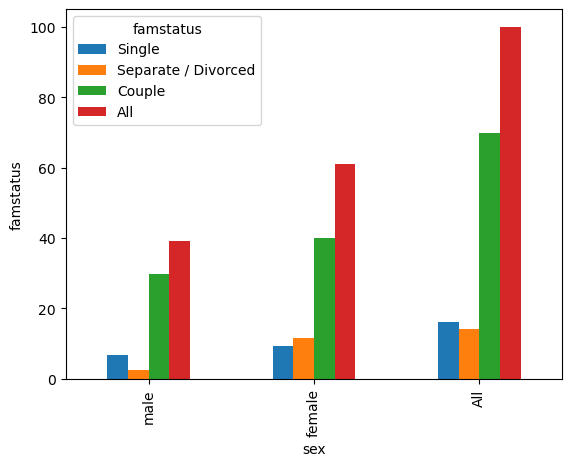

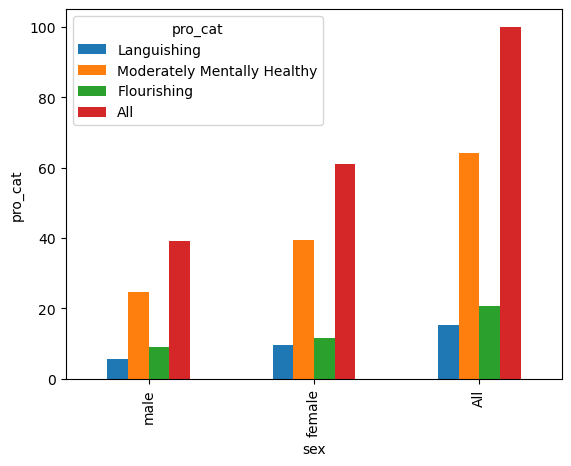

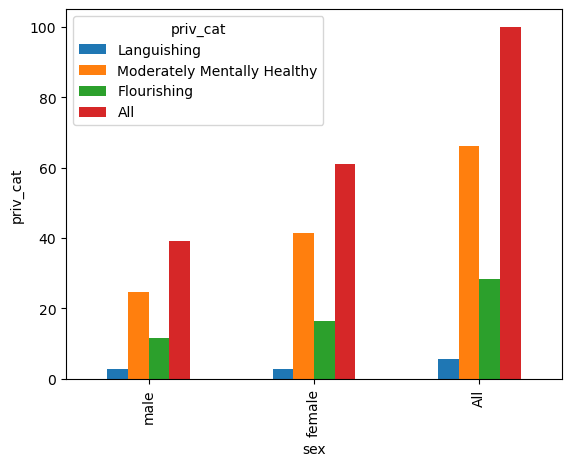

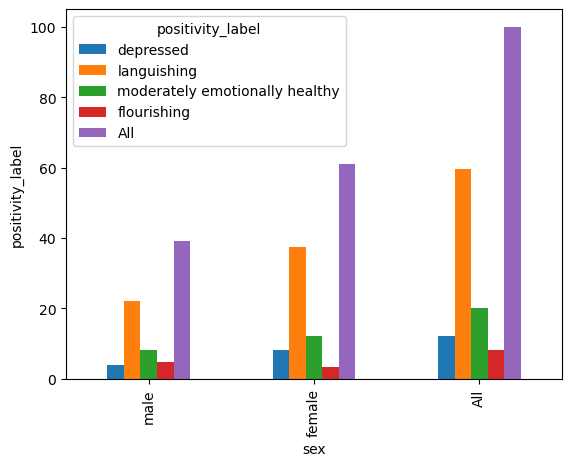

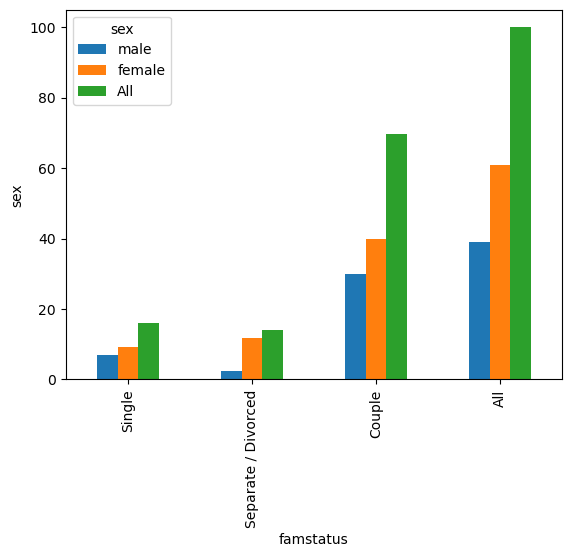

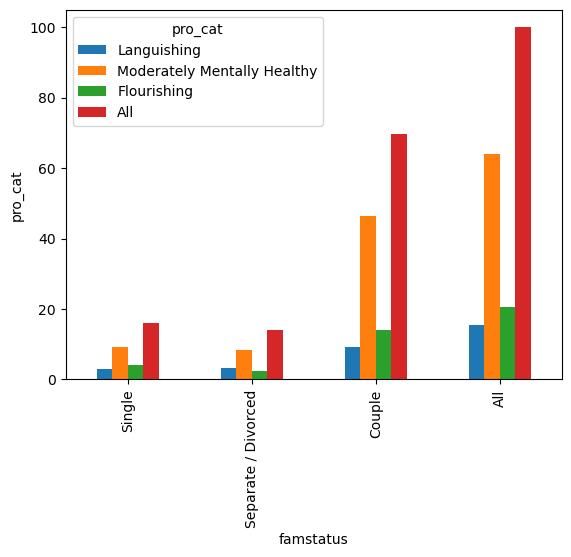

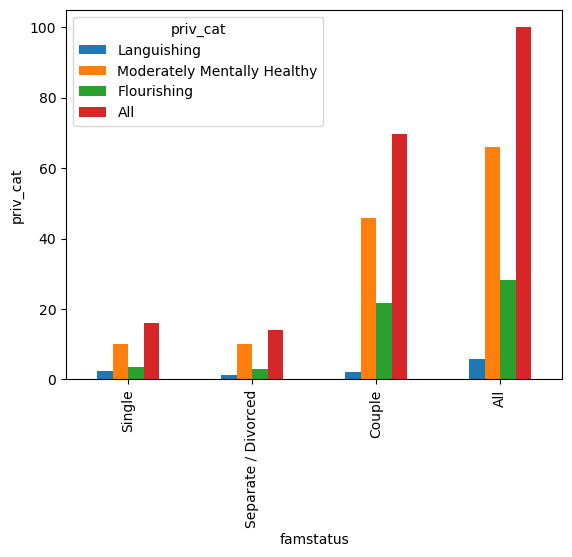

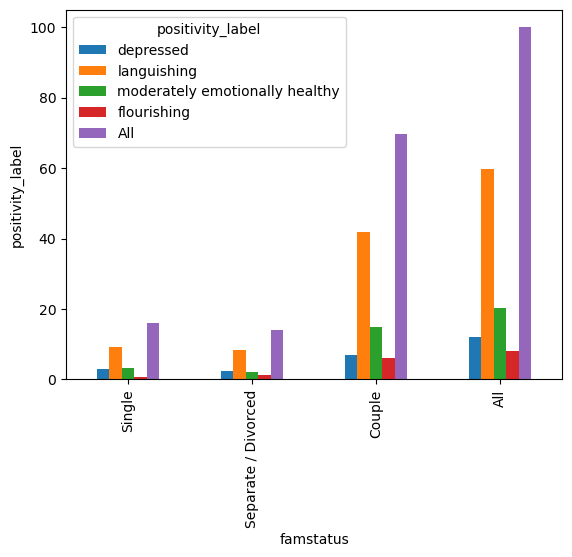

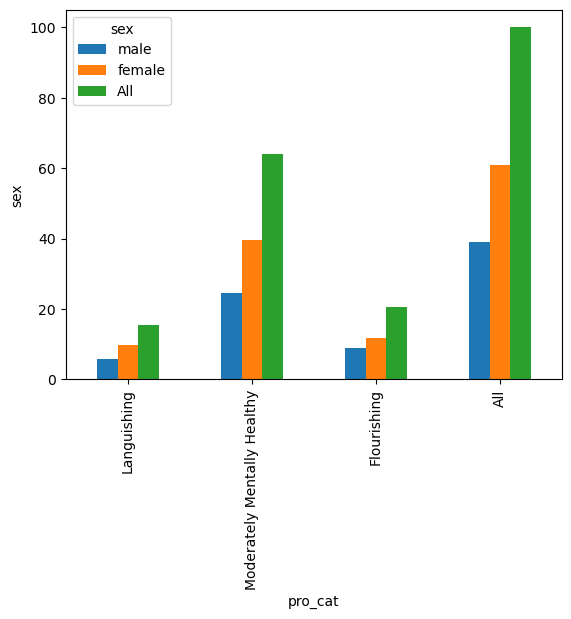

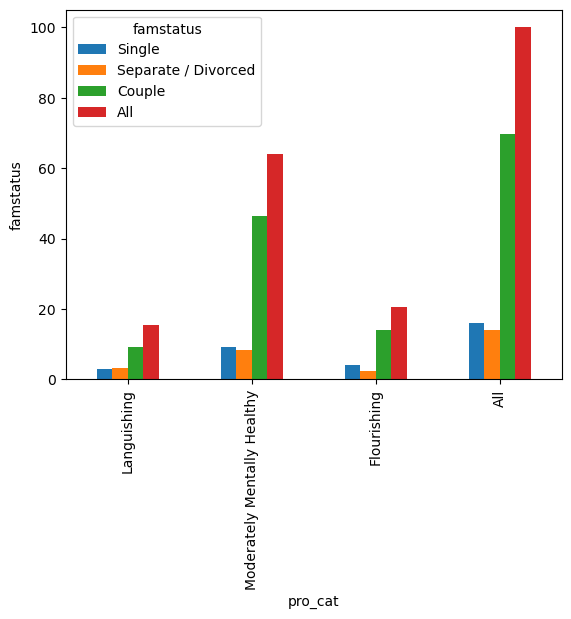

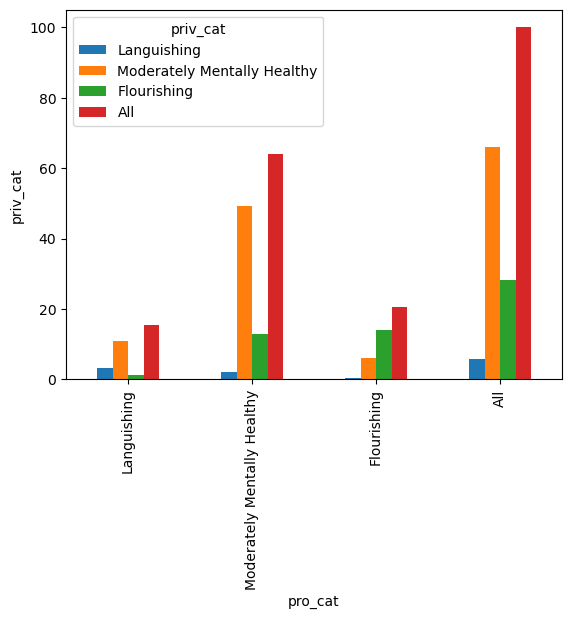

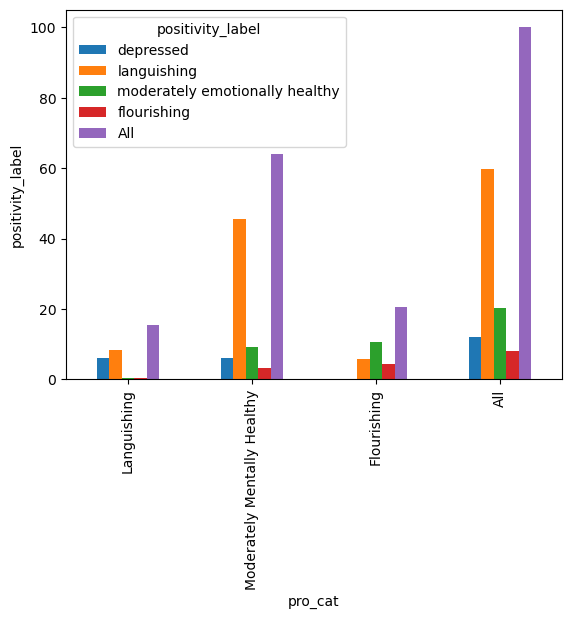

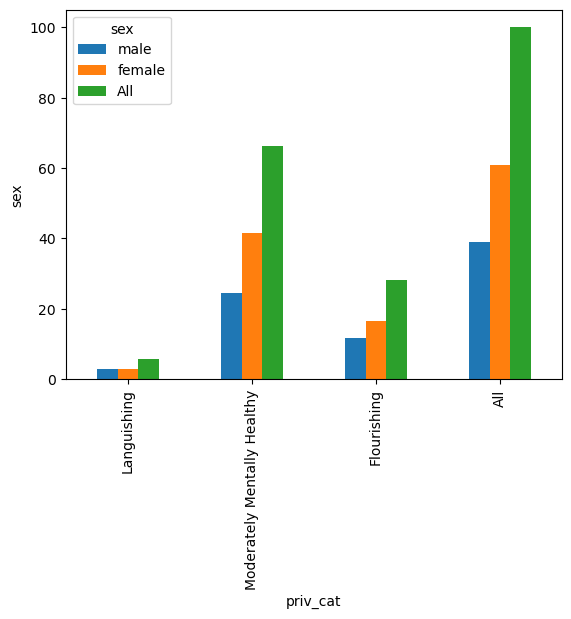

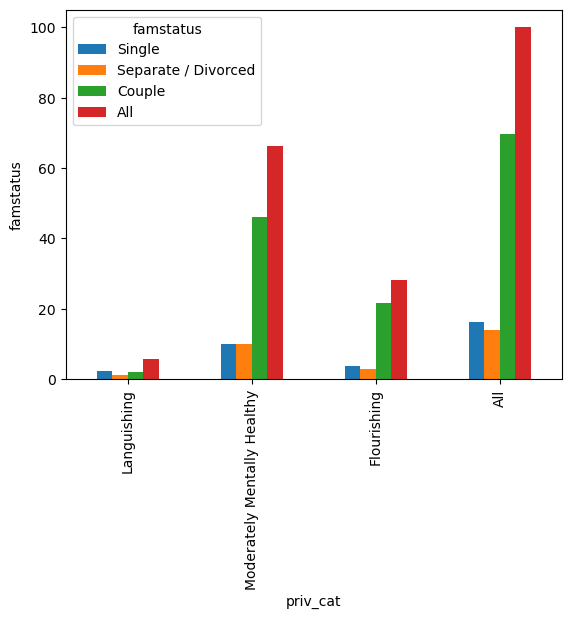

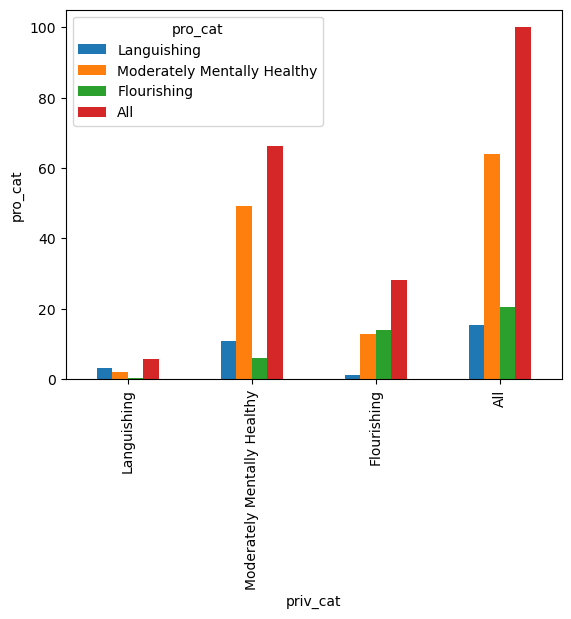

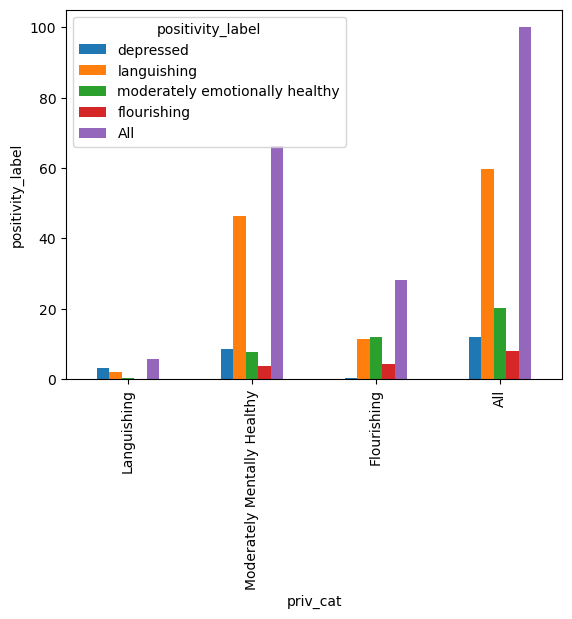

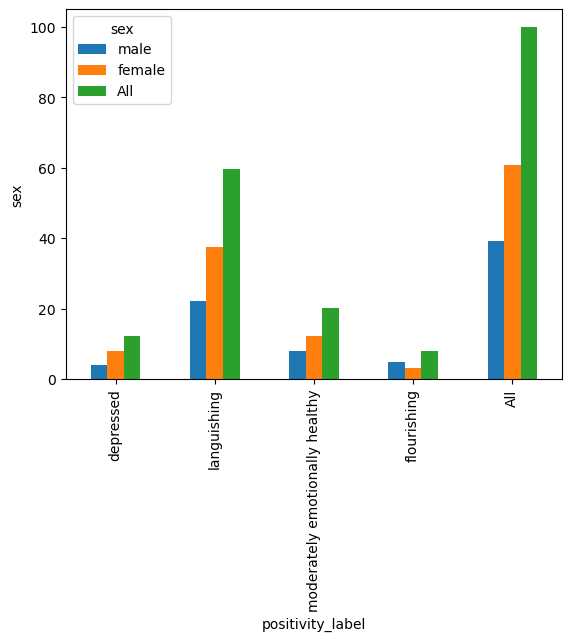

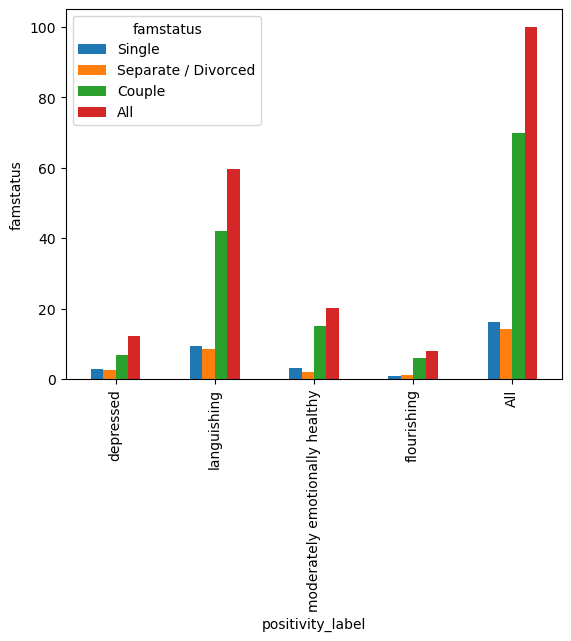

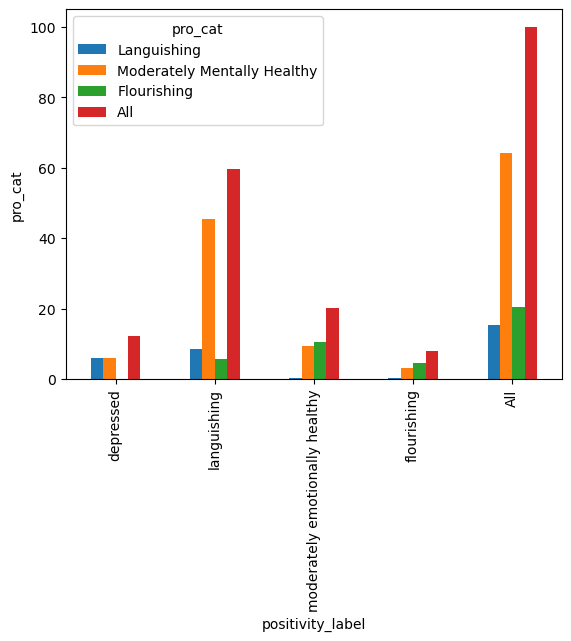

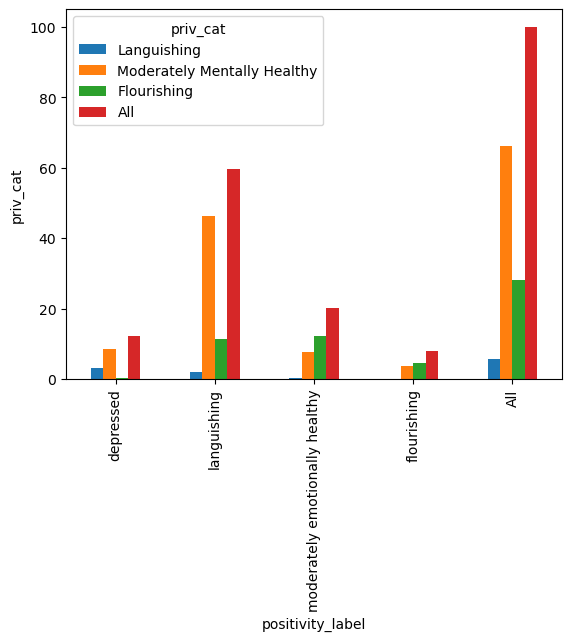

In [27]:
for i in cat_cols:
    for j in cat_cols:
        if i!=j:
            cont_table = (pd.crosstab(index=df[i], columns=df[j], normalize=True, margins=True) * 100)
            cont_table.plot(kind="bar", stacked=False)
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()


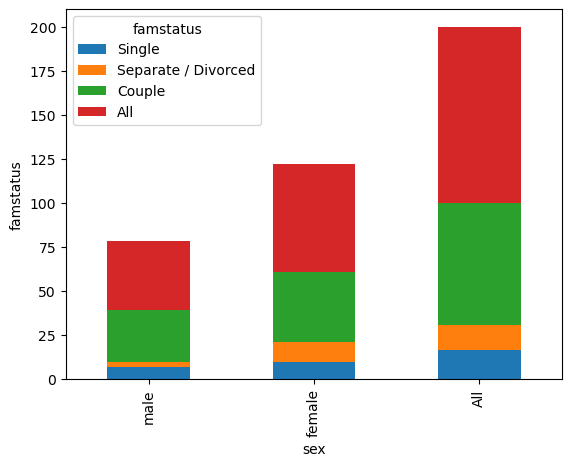

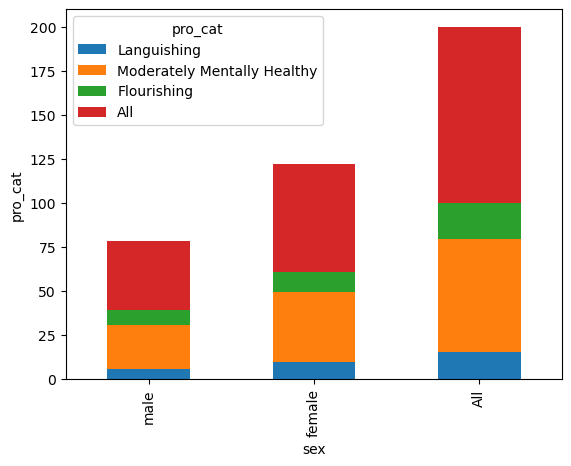

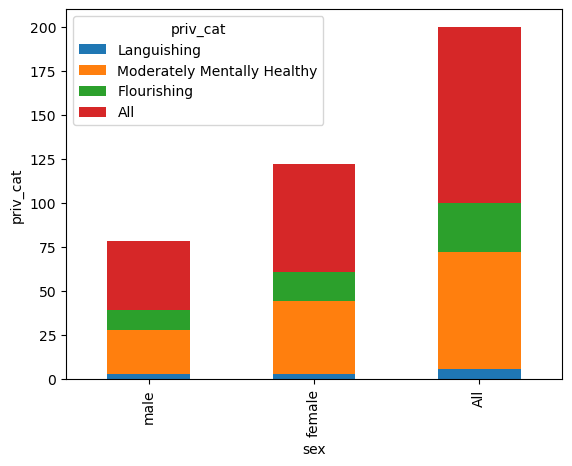

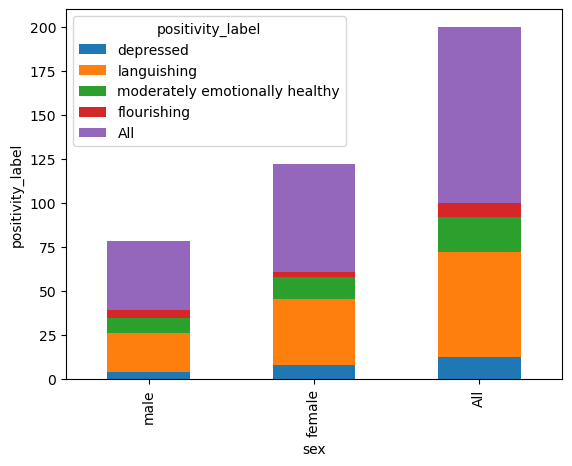

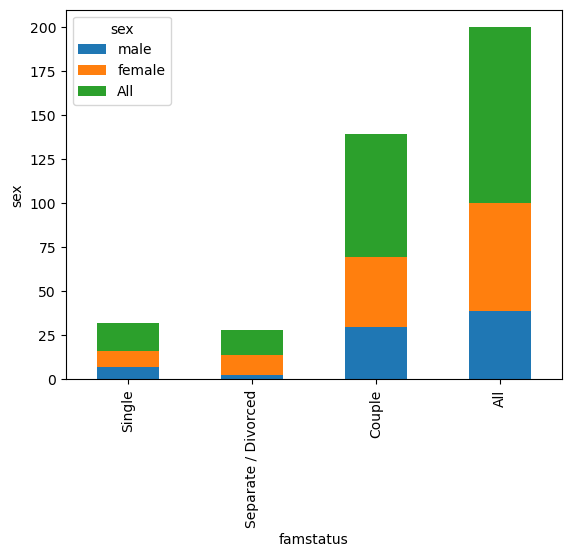

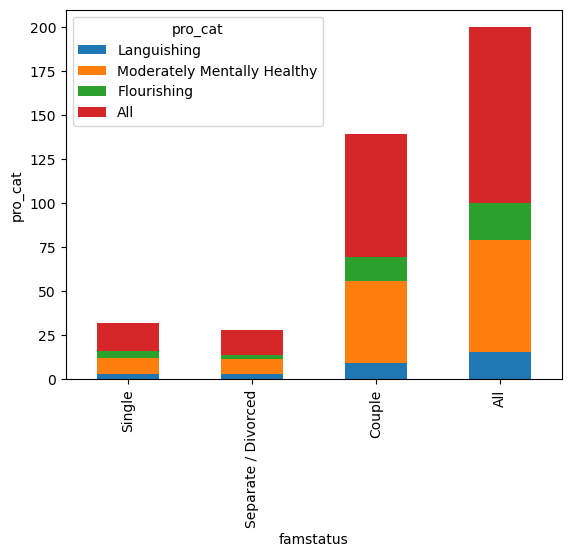

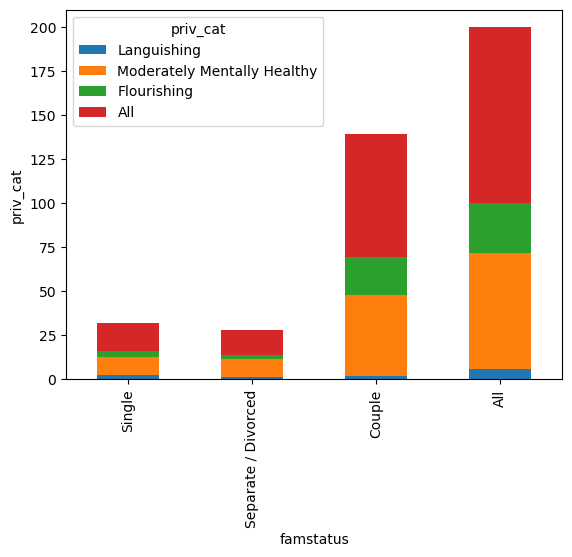

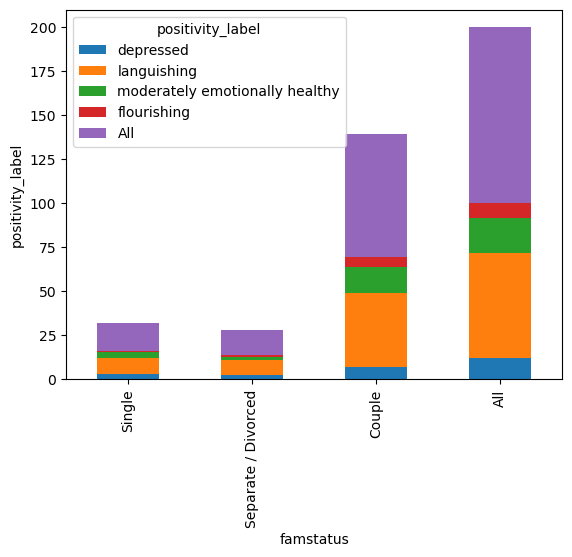

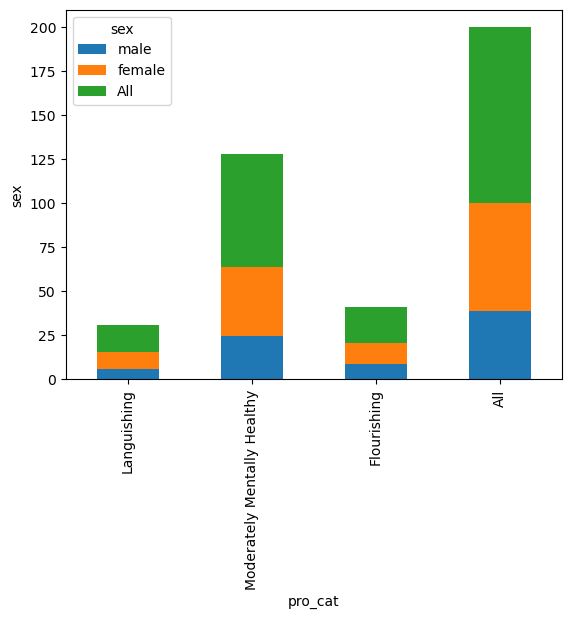

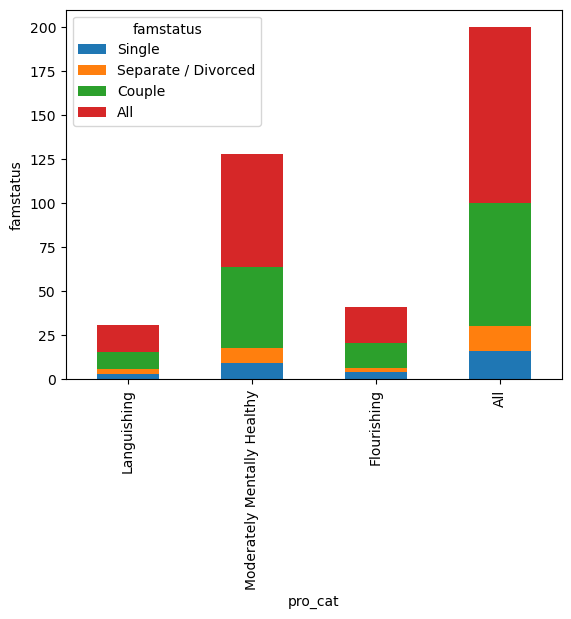

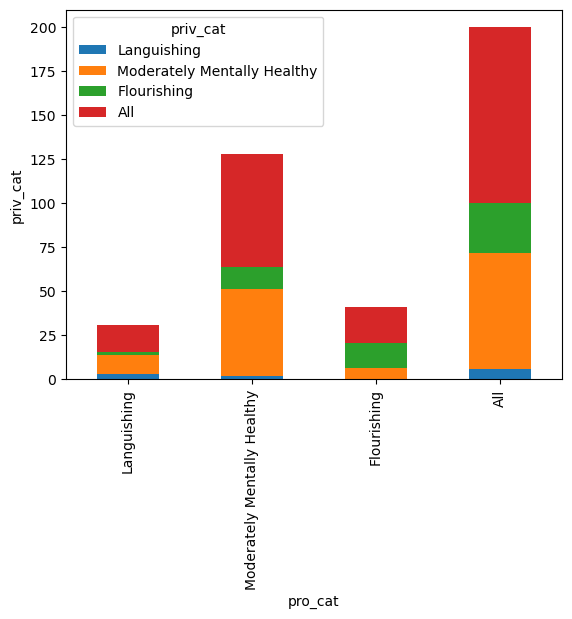

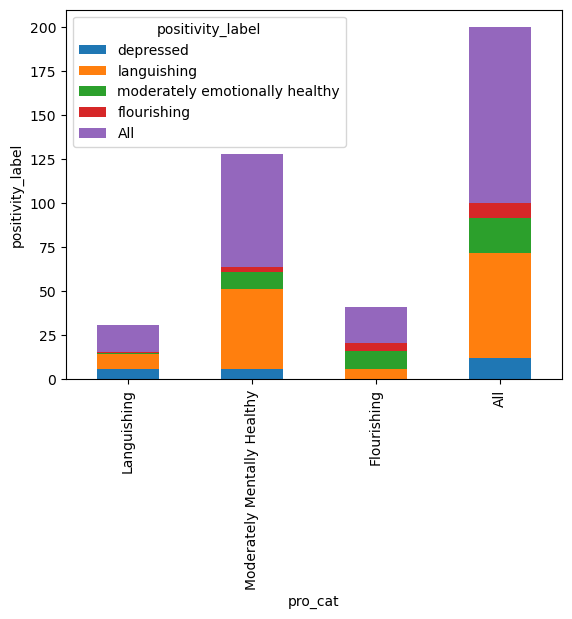

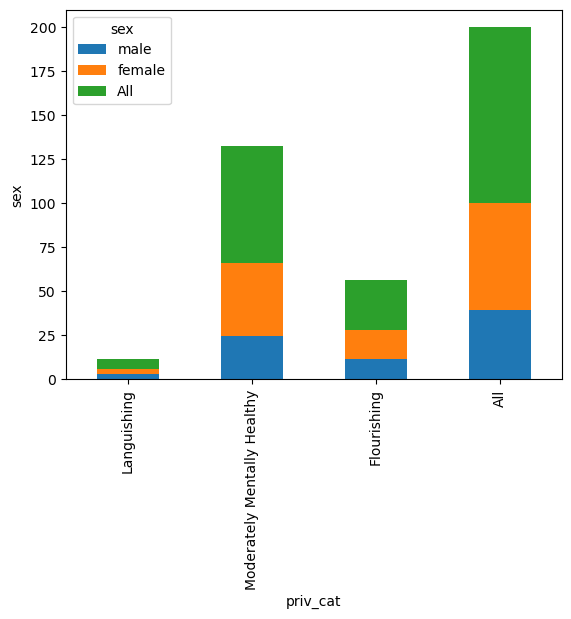

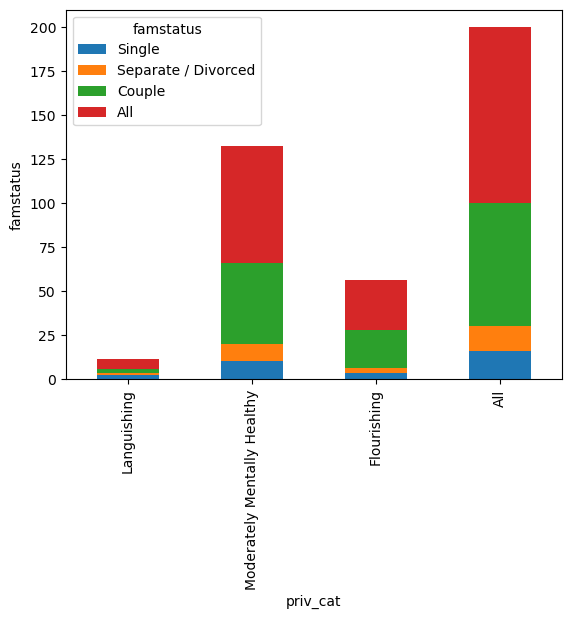

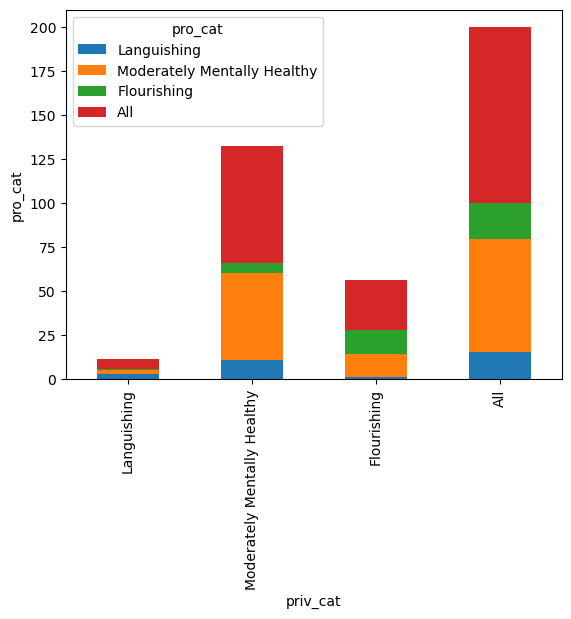

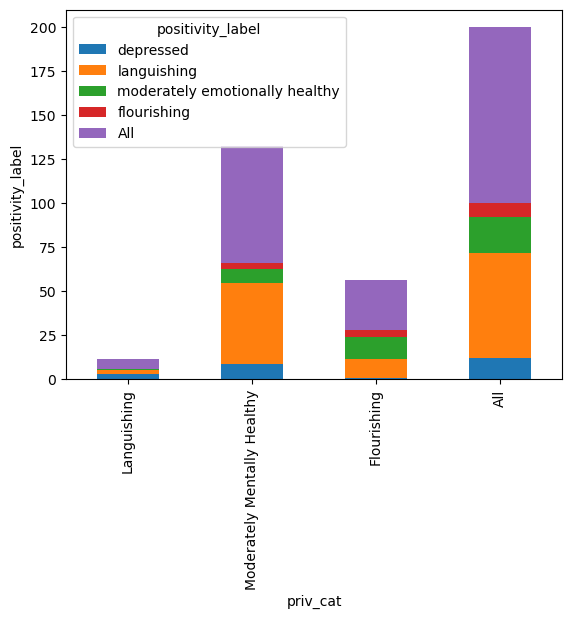

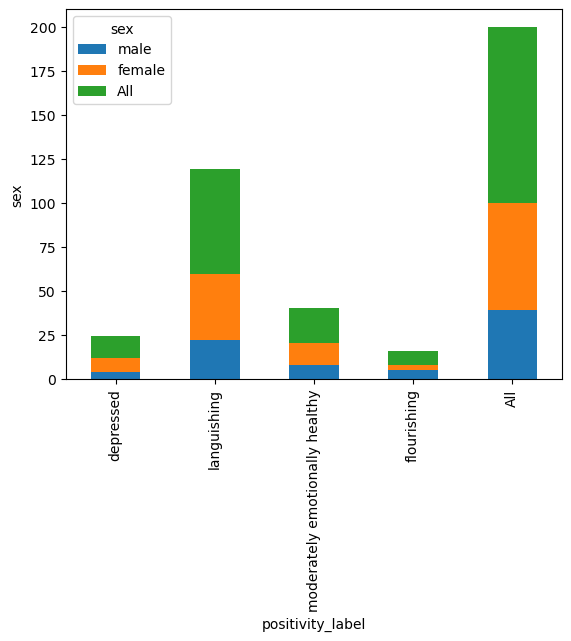

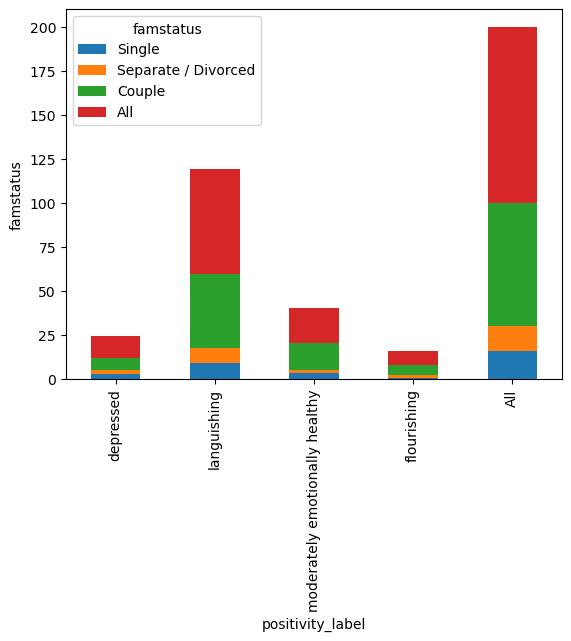

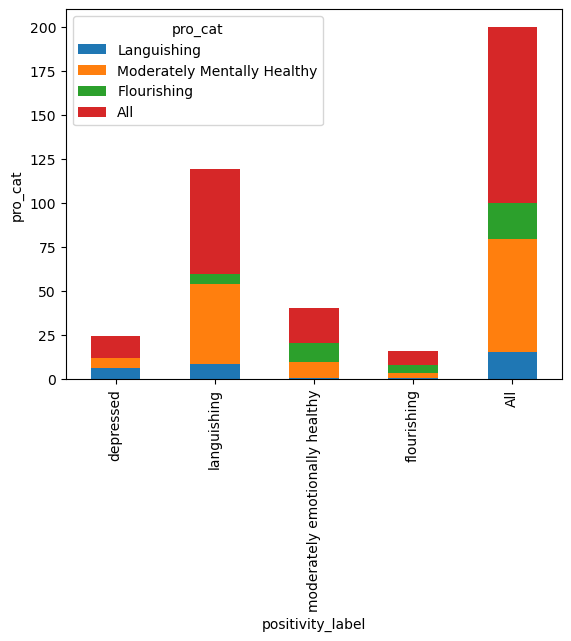

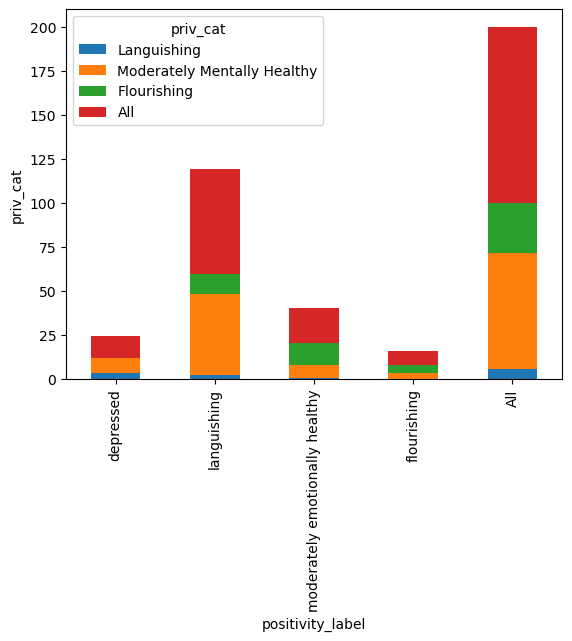

In [28]:
for i in cat_cols:
    for j in cat_cols:
        if i!=j:
            cont_table = (pd.crosstab(index=df[i], columns=df[j], normalize=True, margins=True) * 100)
            cont_table.plot(kind="bar", stacked=True)
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()

2.	If the variables are both quantitative.

2.1.	Compute the correlation (table)

2.2.	Check the significance of their relationship with the correlation test & provide the r value

2.3.	Plot their scatter plot (matrix)


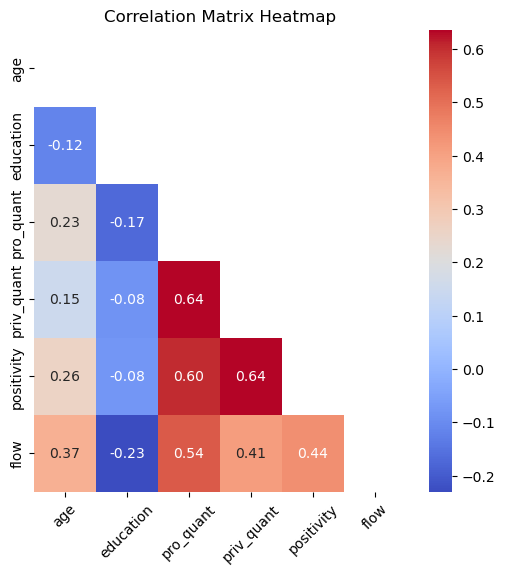

In [29]:
import seaborn as sns
import numpy as np

heatmap_cols=num_cols

correlation_matrix = df[heatmap_cols].corr()

mask=np.triu(correlation_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.show()

In [30]:
# with the following code I have p value = 0 almost everywhere...
"""
from scipy.stats import ttest_ind

tt_dict={}
temp=[]
alpha=0.05

for i in num_cols:
    temp.append(i)
    for j in num_cols:
        if not(j in temp):
            t,p=ttest_ind(df[i],df[j],equal_var=False)
            critical_value = t.ppf(1 - alpha / 2, df=N - 1)
            if abs(Z) > critical_value:
                print(f"Reject Ho! Z={Z} C={critical_value}")
        return False
    else:
        print(f"Accept Ho! Z={Z} C={critical_value}")
                
            if p>alpha:
                conclusion="likely correlated"
            if p<=alpha:
                conclusion="NOT likely correlated"
            
            tt_dict[str(i)+" / "+str(j)]={"conclusion":conclusion,"t-value":t,"p-value":p}
tt_df=pd.DataFrame.from_dict(tt_dict)
display(tt_df)
"""

'\nfrom scipy.stats import ttest_ind\n\ntt_dict={}\ntemp=[]\nalpha=0.05\n\nfor i in num_cols:\n    temp.append(i)\n    for j in num_cols:\n        if not(j in temp):\n            t,p=ttest_ind(df[i],df[j],equal_var=False)\n            critical_value = t.ppf(1 - alpha / 2, df=N - 1)\n            if abs(Z) > critical_value:\n                print(f"Reject Ho! Z={Z} C={critical_value}")\n        return False\n    else:\n        print(f"Accept Ho! Z={Z} C={critical_value}")\n                \n            if p>alpha:\n                conclusion="likely correlated"\n            if p<=alpha:\n                conclusion="NOT likely correlated"\n            \n            tt_dict[str(i)+" / "+str(j)]={"conclusion":conclusion,"t-value":t,"p-value":p}\ntt_df=pd.DataFrame.from_dict(tt_dict)\ndisplay(tt_df)\n'

In [31]:
from scipy.stats import pearsonr

tt_dict={}
temp=[]
alpha=0.05

for i in num_cols:
    temp.append(i)
    for j in num_cols:
        if not(j in temp):
            r,p=pearsonr(df[i],df[j])
            
            if p>alpha:
                conclusion="2 means likely equals"
            else:
                conclusion="2 means NOT likely equals"
            
            tt_dict[str(i)+" / "+str(j)]={"conclusion":conclusion,"p-value":p,"Pearson s r":r}
tt_df=pd.DataFrame.from_dict(tt_dict)
display(tt_df)

age / education            age / pro_quant  \
conclusion   2 means likely equals  2 means NOT likely equals   
p-value                   0.068031                   0.000266   
Pearson s r              -0.116069                   0.229625   

                      age / priv_quant           age / positivity  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                       0.016882                   0.000042   
Pearson s r                   0.151607                   0.257054   

                            age / flow      education / pro_quant  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                   0.007424   
Pearson s r                   0.367994                  -0.169627   

            education / priv_quant education / positivity  \
conclusion   2 means likely equals  2 means likely equals   
p-value                   0.198999                0.22437   
Pearson s r              -0.081837              -0.077427   

                      education / flow     pro_quant / priv_quant  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                       0.000254                        0.0   
Pearson s r                  -0.230323                   0.635679   

                pro_quant / positivity           pro_quant / flow  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                        0.0   
Pearson s r                   0.603502                   0.536229   

               priv_quant / positivity          priv_quant / flow  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                        0.0   
Pearson s r                      0.636                   0.409439   

                     positivity / flow  
conclusion   2 means NOT likely equals  
p-value                            0.0  
Pearson s r                   0.439782

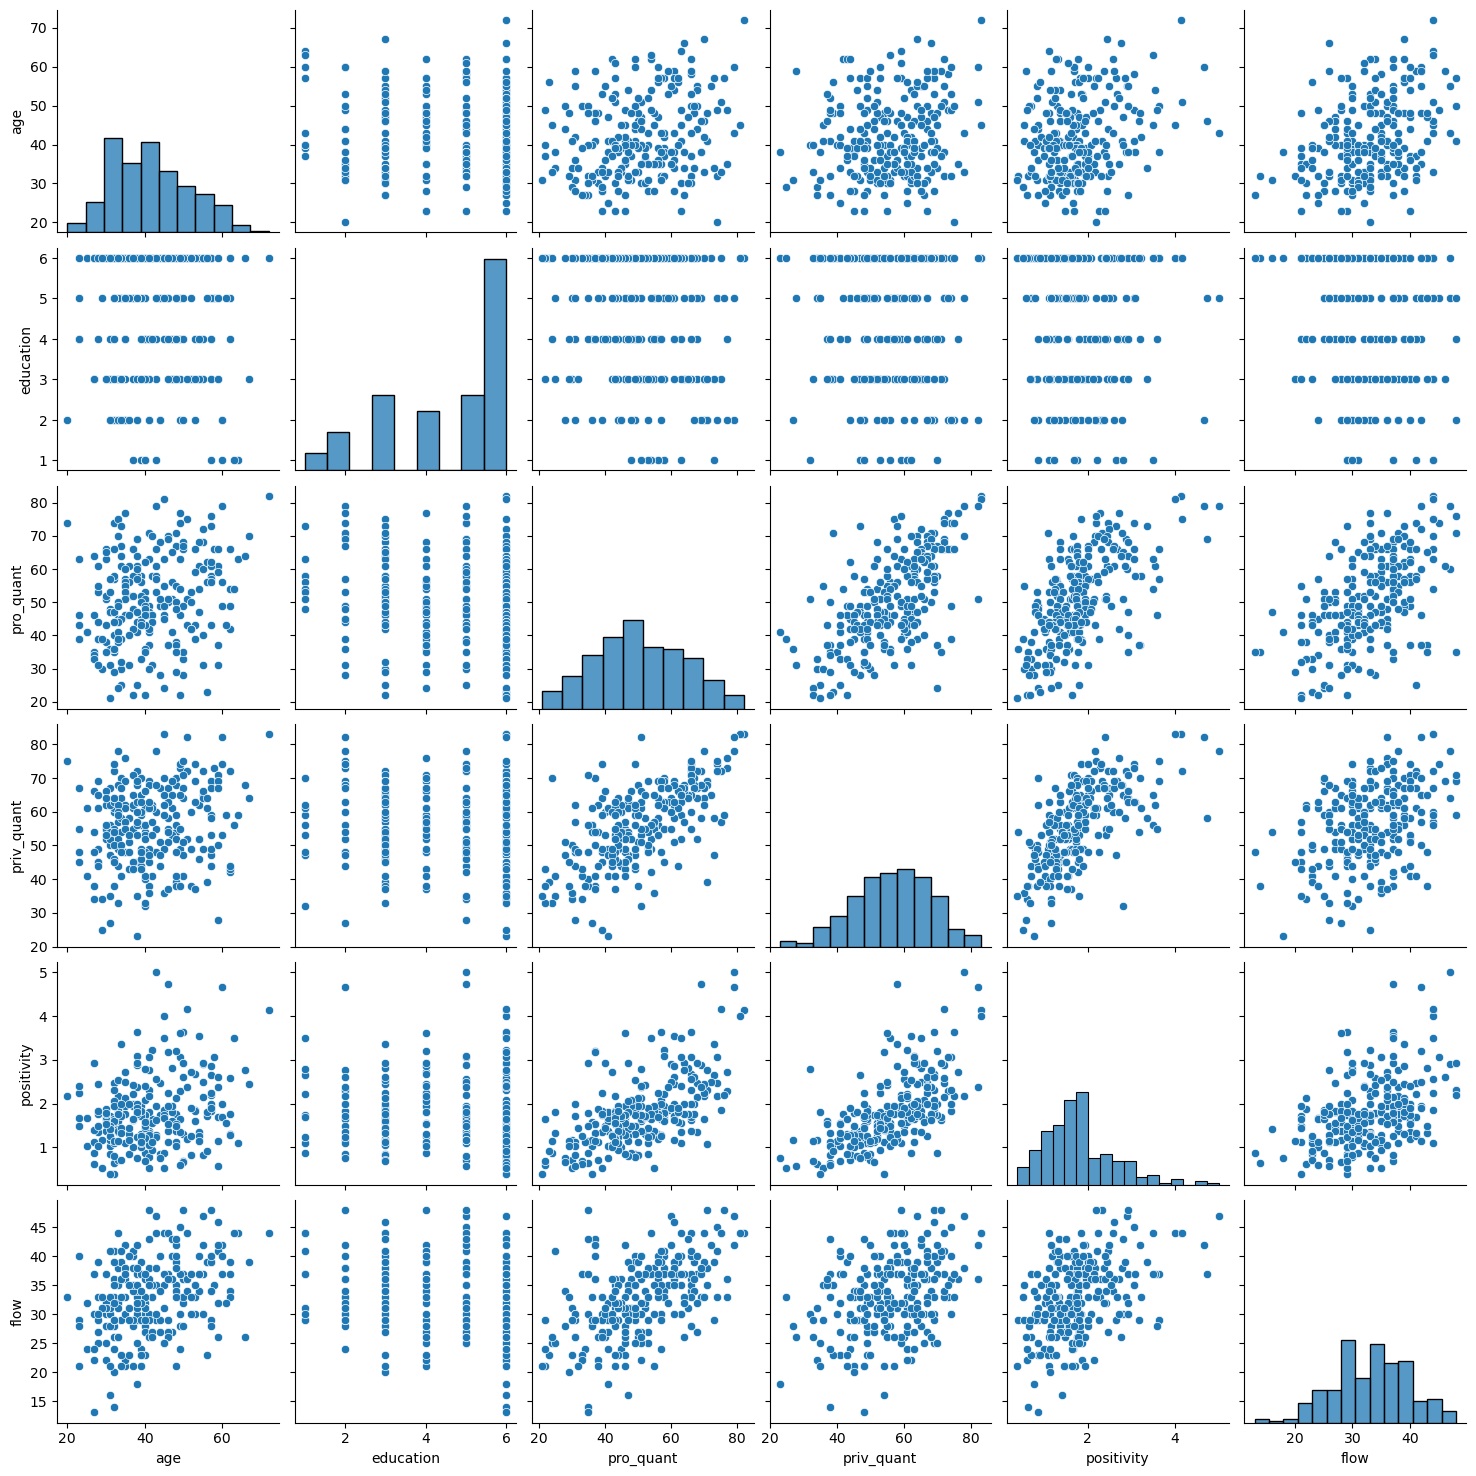

In [32]:
sns.pairplot(df[num_cols])
plt.show()

In [33]:
num_cols

['age', 'education', 'pro_quant', 'priv_quant', 'positivity', 'flow']

In [34]:
cat_cols

['sex', 'famstatus', 'pro_cat', 'priv_cat', 'positivity_label']

3.	If the variables are mixed categorical & quantitative.

3.1.	Compute the anova table

3.2.	Check the significance of the difference in values between groups

3.3.	Plot the grouped boxplots


In [ ]:
#https://www.pythonfordatascience.org/anova-python/

"""
This table provides all the information one needs in order to interprete if the results are significant; 
however, it does not provide any effect size measures to tell if the statistical significance is meaningful. 
The function below calculates eta-squared ( ) and omega-squared ( ). A quick note, eta-squared ( )
 is the exact same thing as R² except when coming from the ANOVA framework people call it eta-squared ( ); 
omega-squared ( ) is considered a better measure of effect size since it is unbiased in it's calculation 
by accounting for the degrees of freedom in the model.
"""

"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov



In [206]:
# Importing libraries 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

# Performing two-way ANOVA 
for i in num_cols:
    model = ols(i+' ~ C(sex) + C(famstatus) + C(pro_cat) + C(priv_cat) + C(positivity_label)', data=df).fit() 
    result = sm.stats.anova_lm(model, type=2) 
    
    # Print the result
    print(i)
    display(anova_table(result)) 

age


sum_sq     df      mean_sq          F  \
C(sex)                  41.500650    1.0    41.500650   0.481507   
C(famstatus)          3121.601978    2.0  1560.800989  18.109031   
C(pro_cat)            1151.822879    2.0   575.911439   6.681952   
C(priv_cat)            163.733889    2.0    81.866944   0.949853   
C(positivity_label)    563.992485    3.0   187.997495   2.181221   
Residual             20426.815862  237.0    86.189096        NaN   

                           PR(>F)    eta_sq  omega_sq  
C(sex)               4.884201e-01  0.001629 -0.001749  
C(famstatus)         4.800809e-08  0.122563  0.115404  
C(pro_cat)           1.502902e-03  0.045224  0.038326  
C(priv_cat)          3.882654e-01  0.006429 -0.000338  
C(positivity_label)  9.091231e-02  0.022144  0.011951  
Residual                      NaN       NaN       NaN

education


sum_sq     df   mean_sq         F    PR(>F)  \
C(sex)                 0.012025    1.0  0.012025  0.005281  0.942129   
C(famstatus)           9.087321    2.0  4.543660  1.995416  0.138235   
C(pro_cat)            13.490519    2.0  6.745260  2.962281  0.053619   
C(priv_cat)            0.068302    2.0  0.034151  0.014998  0.985115   
C(positivity_label)   22.289982    3.0  7.429994  3.262992  0.022166   
Residual             539.660721  237.0  2.277049       NaN       NaN   

                       eta_sq  omega_sq  
C(sex)               0.000021 -0.003859  
C(famstatus)         0.015544  0.007724  
C(pro_cat)           0.023076  0.015227  
C(priv_cat)          0.000117 -0.007643  
C(positivity_label)  0.038128  0.026340  
Residual                  NaN       NaN

pro_quant


sum_sq     df       mean_sq           F  \
C(sex)                 154.578725    1.0    154.578725    3.474610   
C(famstatus)           103.940859    2.0     51.970429    1.168188   
C(pro_cat)           32402.901975    2.0  16201.450988  364.175129   
C(priv_cat)            616.158163    2.0    308.079082    6.924981   
C(positivity_label)    739.584862    3.0    246.528287    5.541446   
Residual             10543.674125  237.0     44.488076         NaN   

                           PR(>F)    eta_sq  omega_sq  
C(sex)               6.355388e-02  0.003469  0.002468  
C(famstatus)         3.127137e-01  0.002333  0.000335  
C(pro_cat)           5.278571e-73  0.727161  0.724441  
C(priv_cat)          1.194305e-03  0.013827  0.011819  
C(positivity_label)  1.081261e-03  0.016597  0.013589  
Residual                      NaN       NaN       NaN

priv_quant


sum_sq     df      mean_sq           F  \
C(sex)                   2.113843    1.0     2.113843    0.053260   
C(famstatus)          1019.271462    2.0   509.635731   12.840625   
C(pro_cat)           10291.220255    2.0  5145.610128  129.647208   
C(priv_cat)          11344.931599    2.0  5672.465800  142.921701   
C(positivity_label)   1249.056601    3.0   416.352200   10.490282   
Residual              9406.369949  237.0    39.689325         NaN   

                           PR(>F)    eta_sq  omega_sq  
C(sex)               8.176843e-01  0.000063 -0.001127  
C(famstatus)         5.073805e-06  0.030597  0.028180  
C(pro_cat)           9.174057e-39  0.308925  0.306178  
C(priv_cat)          1.908273e-41  0.340556  0.337771  
C(positivity_label)  1.665910e-06  0.037495  0.033880  
Residual                      NaN       NaN       NaN

positivity


sum_sq     df    mean_sq           F        PR(>F)  \
C(sex)                2.821011    1.0   2.821011   32.787527  3.097993e-08   
C(famstatus)          1.419841    2.0   0.709921    8.251137  3.434225e-04   
C(pro_cat)           45.459442    2.0  22.729721  264.178848  4.674565e-61   
C(priv_cat)          10.247315    2.0   5.123658   59.550310  1.112527e-21   
C(positivity_label)  79.114997    3.0  26.371666  306.507777  2.919035e-81   
Residual             20.391276  237.0   0.086039         NaN           NaN   

                       eta_sq  omega_sq  
C(sex)               0.017692  0.017143  
C(famstatus)         0.008904  0.007821  
C(pro_cat)           0.285095  0.283862  
C(priv_cat)          0.064265  0.063152  
C(positivity_label)  0.496162  0.494277  
Residual                  NaN       NaN

flow


sum_sq     df      mean_sq          F        PR(>F)  \
C(sex)                 21.106253    1.0    21.106253   0.648235  4.215513e-01   
C(famstatus)          143.723334    2.0    71.861667   2.207084  1.122775e-01   
C(pro_cat)           2060.169539    2.0  1030.084769  31.636942  6.635109e-13   
C(priv_cat)           259.813439    2.0   129.906720   3.989819  1.975948e-02   
C(positivity_label)   555.992040    3.0   185.330680   5.692052  8.854837e-04   
Residual             7716.614750  237.0    32.559556        NaN           NaN   

                       eta_sq  omega_sq  
C(sex)               0.001962 -0.001061  
C(famstatus)         0.013360  0.007285  
C(pro_cat)           0.191512  0.184898  
C(priv_cat)          0.024152  0.018044  
C(positivity_label)  0.051685  0.042476  
Residual                  NaN       NaN

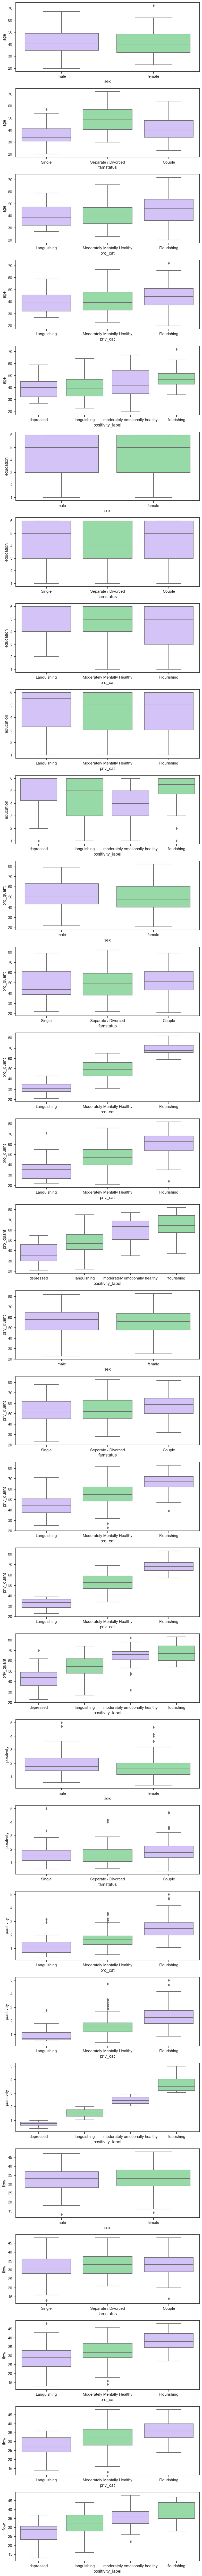

In [118]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset(df)

# Draw a nested boxplot

fig, ax = plt.subplots(nrows = len(cat_cols)*len(num_cols), ncols = 1, figsize = [8,100])
row=0
for i in num_cols:
    #print("----------------------------------------------------------------------------------------------")
    for j in cat_cols:
        sns.boxplot(x=j, y=i, palette=["m", "g"], data=df, ax=ax[row])
        #sns.despine(offset=10, trim=True)
        row+=1
plt.tight_layout()
plt.show()


In [208]:
# doesn't work either. I'll that later
"""
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset(df)

# Draw a nested boxplot

fig, ax = plt.subplots(nrows = len(cat_cols)*len(num_cols), ncols = 1, figsize = [8,100])
row=0
for j in cat_cols:
    sns.boxplot(x=j, y=num_cols, palette=["m", "g"], data=df, ax=ax[row])
    row+=1
plt.tight_layout()
plt.show()
"""

'\nimport seaborn as sns\nsns.set_theme(style="ticks", palette="pastel")\n\n# Load the example tips dataset\n#tips = sns.load_dataset(df)\n\n# Draw a nested boxplot\n\nfig, ax = plt.subplots(nrows = len(cat_cols)*len(num_cols), ncols = 1, figsize = [8,100])\nrow=0\nfor j in cat_cols:\n    sns.boxplot(x=j, y=num_cols, palette=["m", "g"], data=df, ax=ax[row])\n    row+=1\nplt.tight_layout()\nplt.show()\n'

# Exercise 3

Apply supervised learning on a quantitative outcome variable (recommended: Flow).

With a linear regression model and a K nearest neighbors regressor (KNN) model


In [87]:
cat_cols

['sex', 'famstatus', 'pro_cat', 'priv_cat', 'positivity_label']

In [89]:
num_cols

['age', 'education', 'pro_quant', 'priv_quant', 'positivity', 'flow']

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                248 non-null    int64   
 1   age               248 non-null    int64   
 2   education         248 non-null    int64   
 3   sex               248 non-null    category
 4   famstatus         248 non-null    category
 5   pro_cat           248 non-null    category
 6   pro_quant         248 non-null    int64   
 7   priv_cat          248 non-null    category
 8   priv_quant        248 non-null    int64   
 9   positivity        248 non-null    float64 
 10  flow              248 non-null    int64   
 11  positivity_label  248 non-null    category
dtypes: category(5), float64(1), int64(6)
memory usage: 15.6 KB


In [105]:
X_cols=['age', 'education', 'pro_quant', 'priv_quant', 'positivity', 'flow']

In [106]:
y_cols='flow'

In [144]:
# Create a function that does it all...

## your code here ##

def LinearRegression_Step3(df, X_cols, y_cols, model):
    # scatter plot matrix
    from matplotlib import pyplot as plt
    import seaborn as sns
    sns.pairplot(df)
    plt.show()
    
    # splitting test and train set
    from sklearn.model_selection import train_test_split
    seed=42

    df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=seed)

    X_train=df_train[X_cols]
    X_test=df_test[X_cols]

    y_train=df_train[y_cols]
    y_test=df_test[y_cols]
    
    
    # correlation table
    df.corr(method="spearman")
    
    # heatmap
    import numpy as np

    correlation_matrix = df.corr(method="spearman")  #because Pearson is for linearity

    mask=np.triu(correlation_matrix)

    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f",mask=mask)

    plt.title('Correlation Matrix Heatmap')
    plt.xticks(rotation=45)
    plt.show()
        
    # Create the scatter plot with regression line
    for i in df.columns:
        if i != y_train.name and df[i].dtype!="category":
            sns.lmplot(x=i,y=y_train.name, data=df, aspect=1.5, line_kws={"color":"red","linewidth":1}, scatter_kws={"s":10,"alpha":0.7})
            #line_kws sont les options d'affichage pour la ligne et scatter_kws pour le scatter avec s la size et alpha la transparence
            plt.xlabel(i)
            plt.ylabel(y_train.name)

            plt.show()
            
    # computes all the performance indicators for a linear regression
    for x in (X_train,X_test):
        if y_train.name in x.columns:
            x.drop(columns=y_train.name, inplace=True)
        
    from sklearn.metrics import mean_squared_error, r2_score
    
    linres=model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # The RMSE (root mean squared error)
    rmse=mean_squared_error(y_test, y_pred,squared=False)
    # The RMSE/mean(Y)
    rmse_m=(mean_squared_error(y_test, y_pred,squared=False))/(np.mean(df[y_test.name]))
    # R² The coefficient of determination: 1 is perfect prediction
    r2= r2_score(y_test, y_pred)
    # compute R²adjusted
    n=X_test.shape[0]
    p=X_test.shape[1]
    r_square_adj=1-(n-1)*(1-r2_score(y_test, y_pred))/(n-p-1)
    print("RMSE error: %.3f" % rmse+"\nRMSE/mean(Y): %.3f" % rmse_m+"\nR²: %.3f" % r2+"\nR²adjusted: %.3f" % r_square_adj)
    
    #my_dict1={"RMSE":rmse,"RMSE/mean(Y":rmse_m,"R²":r2,"R²adjusted":r_square_adj}
    my_table1=pd.DataFrame([rmse,rmse_m,r2,r_square_adj],
                                     index=["RMSE","RMSE/mean(Y)","R²","R²adjusted"],
                                     columns=[str(model)]
                                    )
    #my_table1.set_index("index",drop=True, append=False, inplace=True, verify_integrity=False)
    
    
    if "KNeighborsRegressor" in str(model):
        return my_table1, None
    
    # compute the betas
    betas=model.coef_
    beta_zero=model.intercept_
    print("beta_zero: %.3f" % beta_zero)
    for i in range(len(betas)):
        print("beta "+str(i+1)+" = "+str(betas[i]))
    #return linres,rmse,rmse_m,r2,r_square_adj
    
    # standardize the result
    import numpy as np
    my_dict={"index":["coefficient (weight)","standardized coefficients"]}
    y_std=np.std(y_test)
    my_dict["beta 0"]=[beta_zero,0]
    for i in range(len(betas)):
        if X_test.iloc[:,i].name != y_test.name:
            x_std=np.std(X_test.iloc[:,i])
            my_dict["beta "+str(i+1)+" "+X_test.iloc[:,i].name] = [betas[i], ((np.std(X_test.iloc[:,i]))/y_std*betas[i]) ]
    my_table=pd.DataFrame.from_dict(my_dict)
    my_table.set_index("index",drop=True, append=False, inplace=True, verify_integrity=False)
    display(my_table)
    return my_table1, my_table

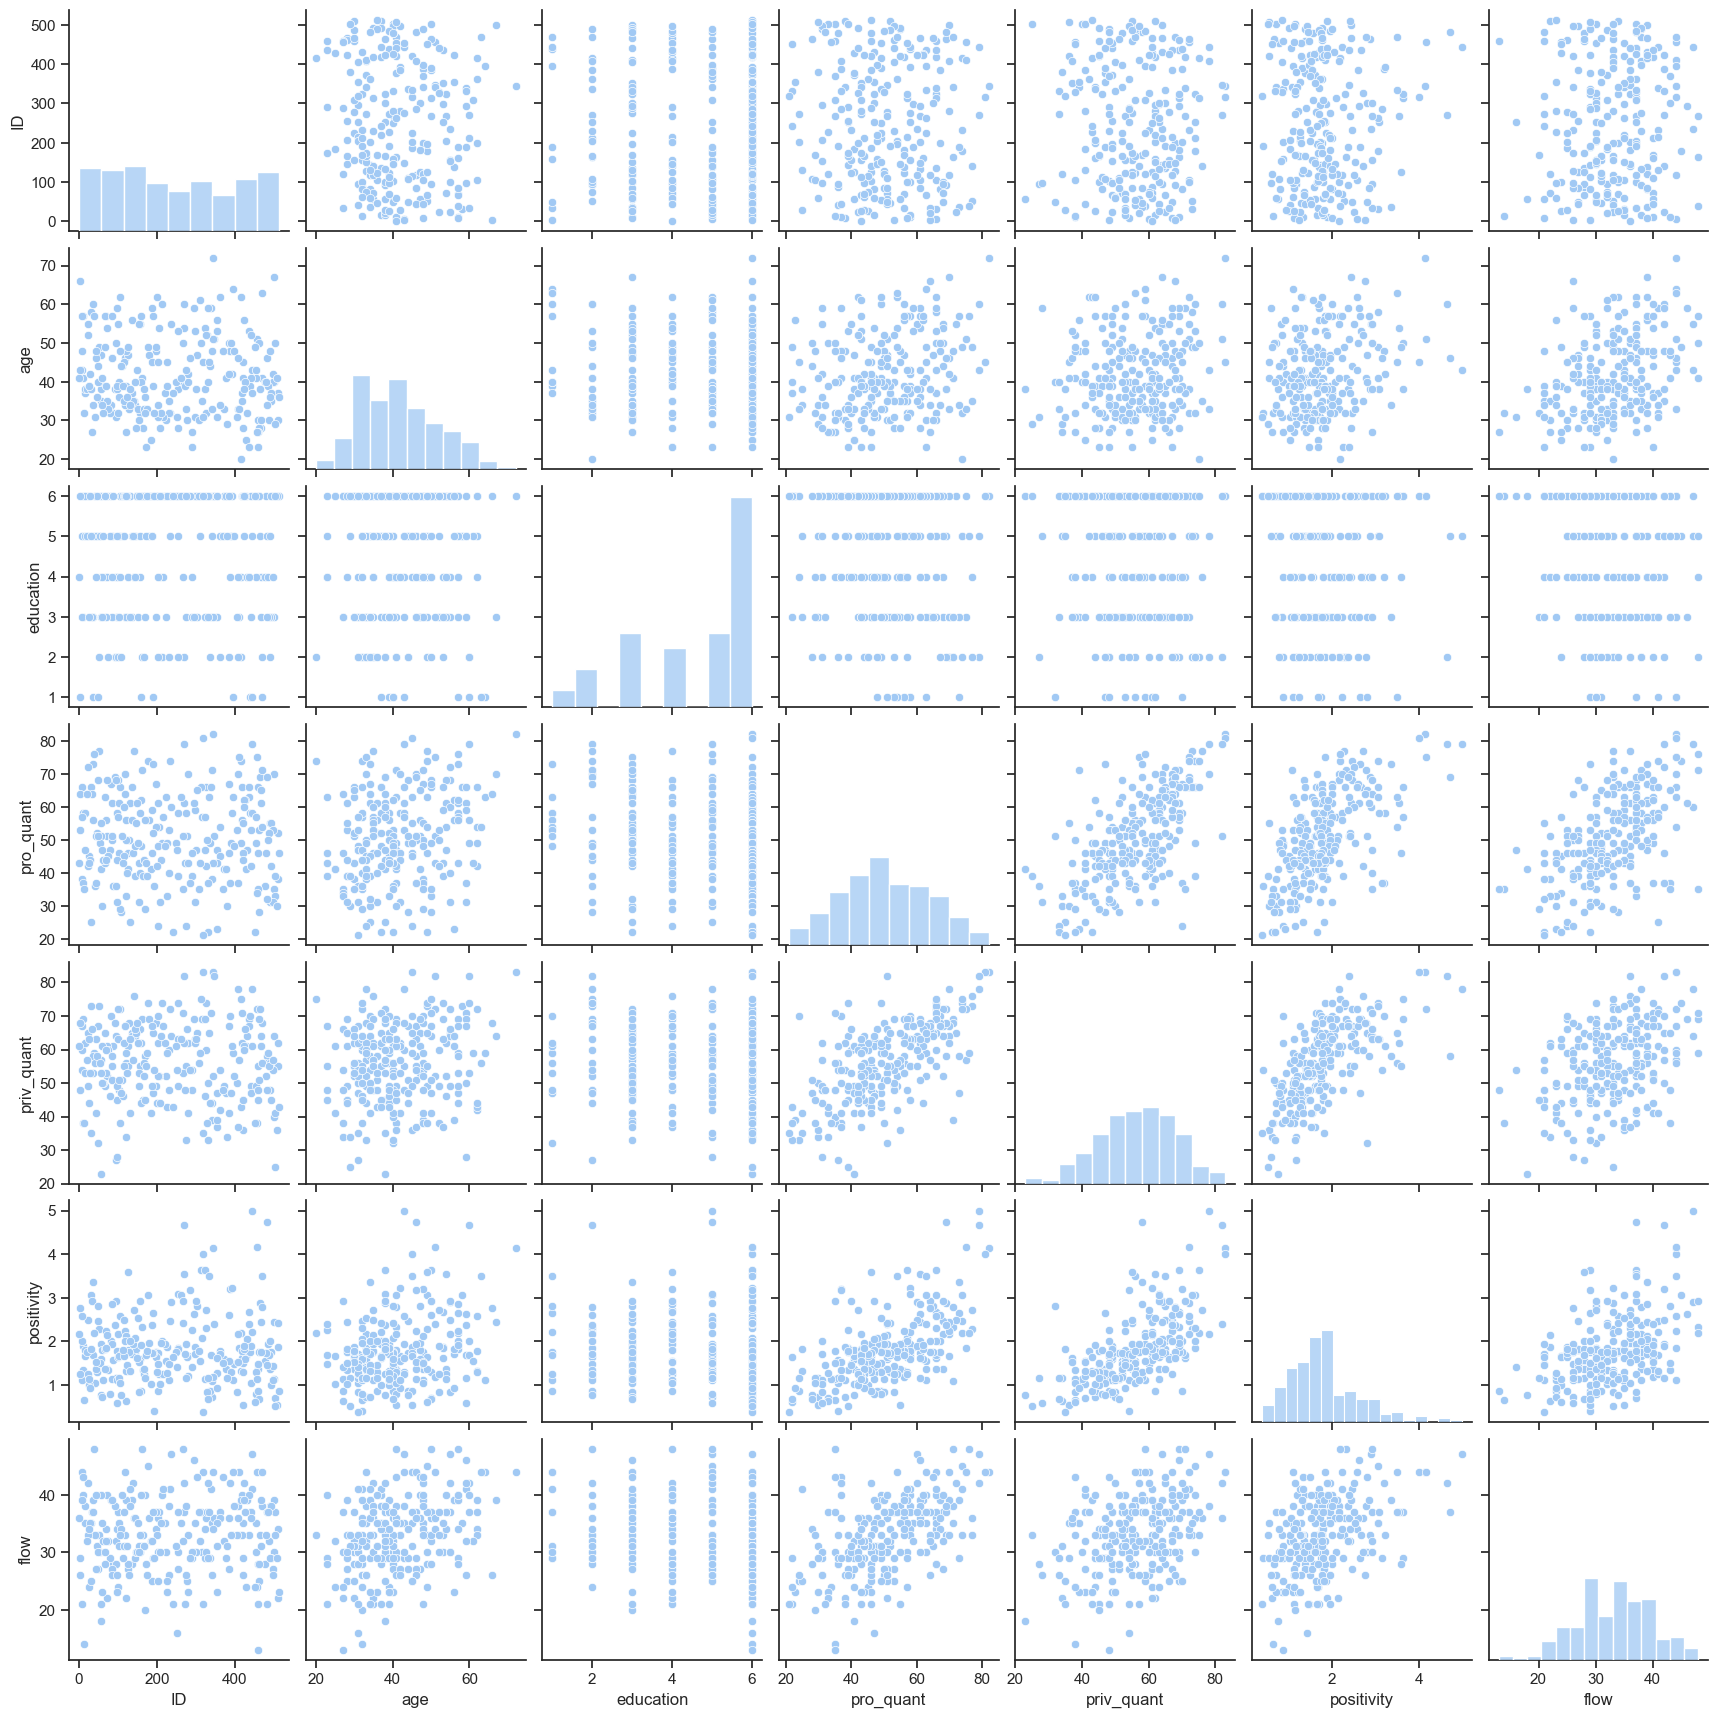

C:\Users\romai\AppData\Local\Temp\ipykernel_20360\1616342563.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="spearman")
C:\Users\romai\AppData\Local\Temp\ipykernel_20360\1616342563.py:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method="spearman")  #because Pearson is for linearity


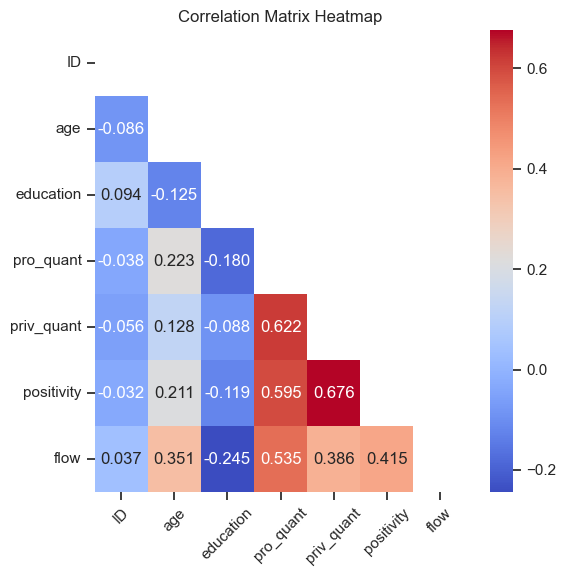

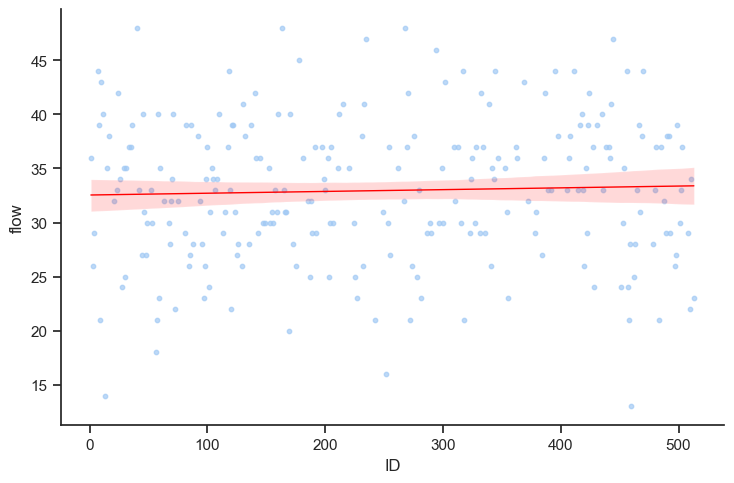

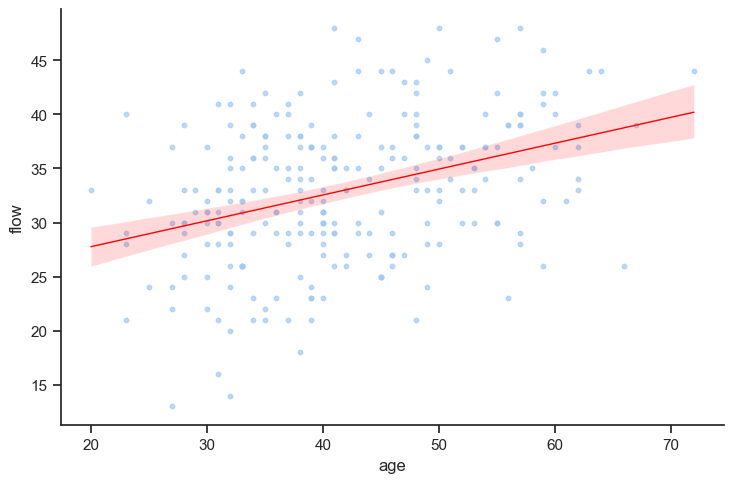

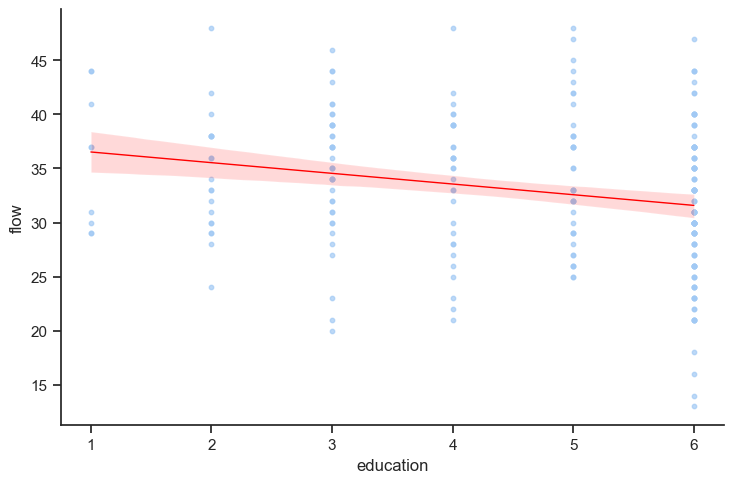

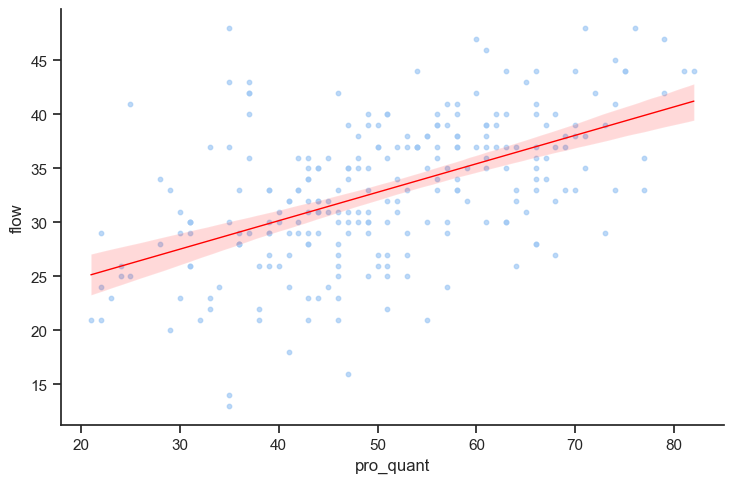

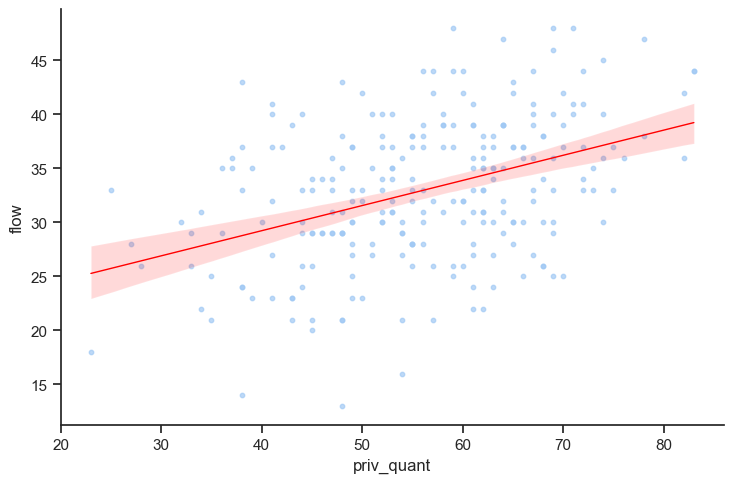

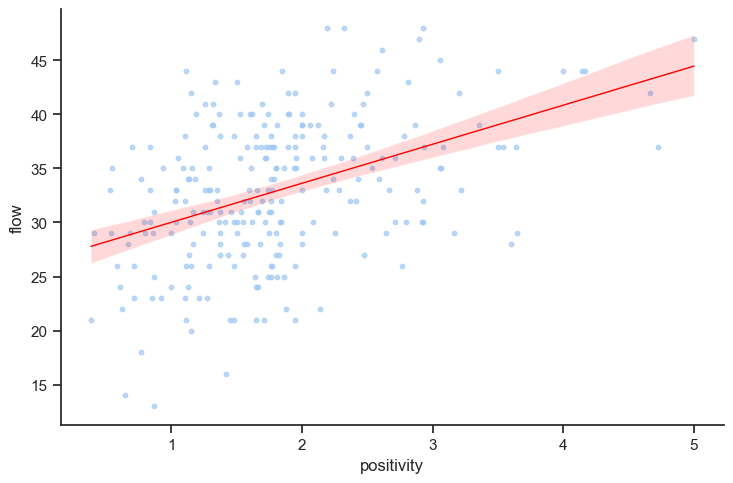

RMSE error: 5.572
RMSE/mean(Y): 0.169
R²: 0.267
R²adjusted: 0.184
beta_zero: 15.772
beta 1 = 0.17236975666711074
beta 2 = -0.5187191865618426
beta 3 = 0.1444390229700516
beta 4 = 0.03825875235458932
beta 5 = 1.6072001302005154


C:\Users\romai\AppData\Local\Temp\ipykernel_20360\1616342563.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=y_train.name, inplace=True)
C:\Users\romai\AppData\Local\Temp\ipykernel_20360\1616342563.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=y_train.name, inplace=True)


beta 0  beta 1 age  beta 2 education  \
index                                                                
coefficient (weight)       15.771924     0.17237         -0.518719   
standardized coefficients   0.000000     0.27788         -0.110848   

                           beta 3 pro_quant  beta 4 priv_quant  \
index                                                            
coefficient (weight)               0.144439           0.038259   
standardized coefficients          0.326556           0.072078   

                           beta 5 positivity  
index                                         
coefficient (weight)                  1.6072  
standardized coefficients             0.2208

In [145]:
from sklearn.linear_model import LinearRegression
LR_perf, LR_coef =LinearRegression_Step3(df,X_cols,y_cols,LinearRegression())


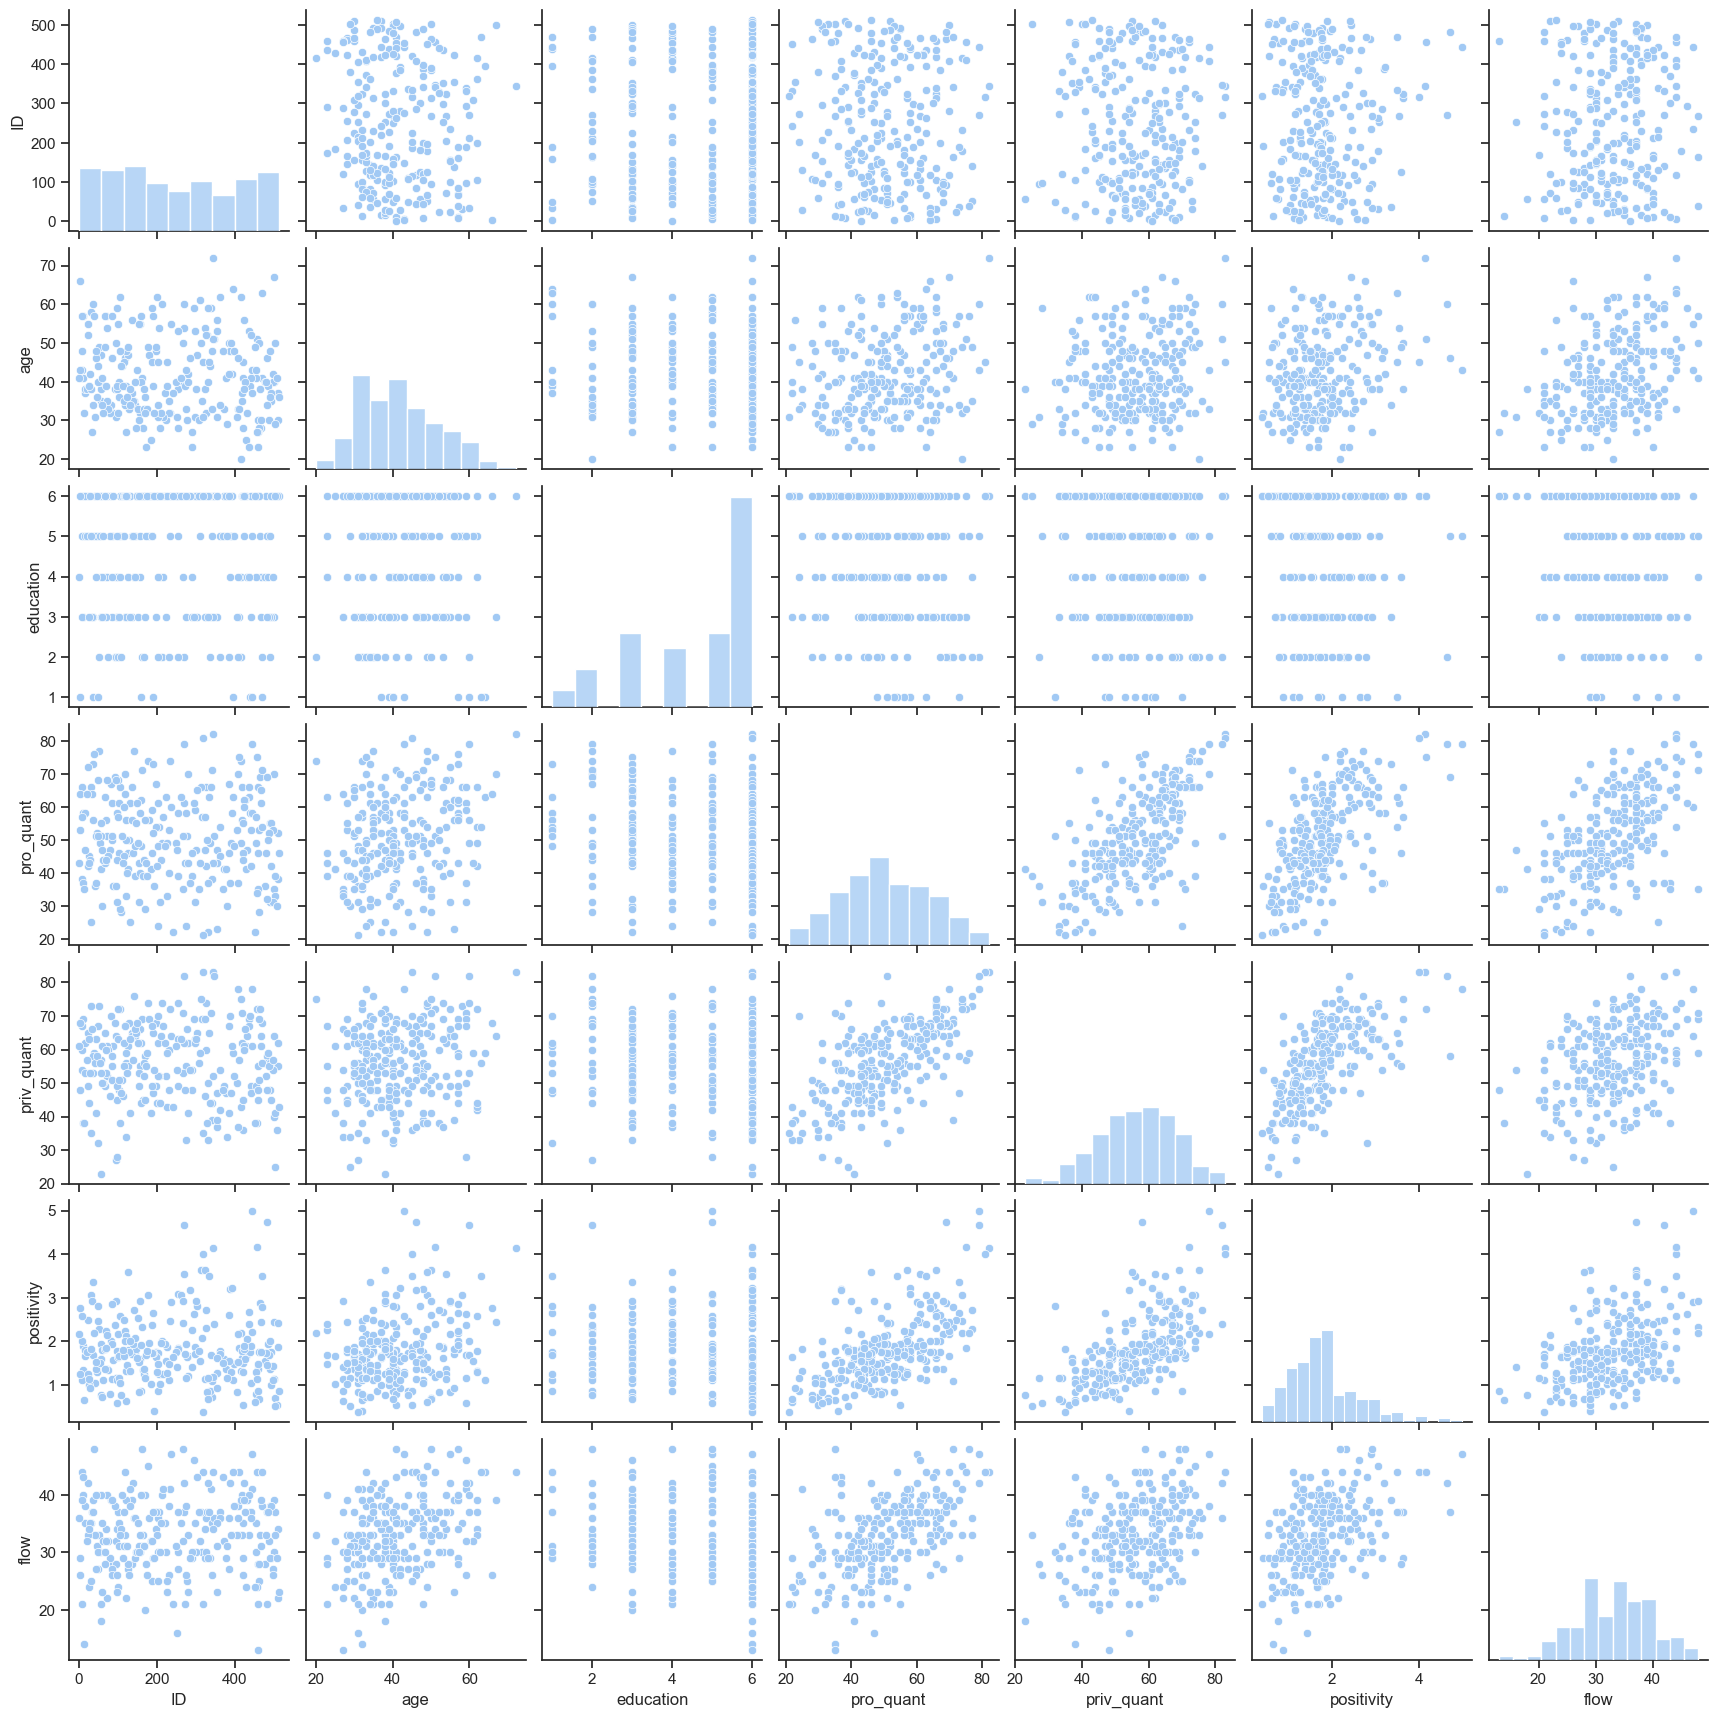

C:\Users\romai\AppData\Local\Temp\ipykernel_20360\1616342563.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="spearman")
C:\Users\romai\AppData\Local\Temp\ipykernel_20360\1616342563.py:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method="spearman")  #because Pearson is for linearity


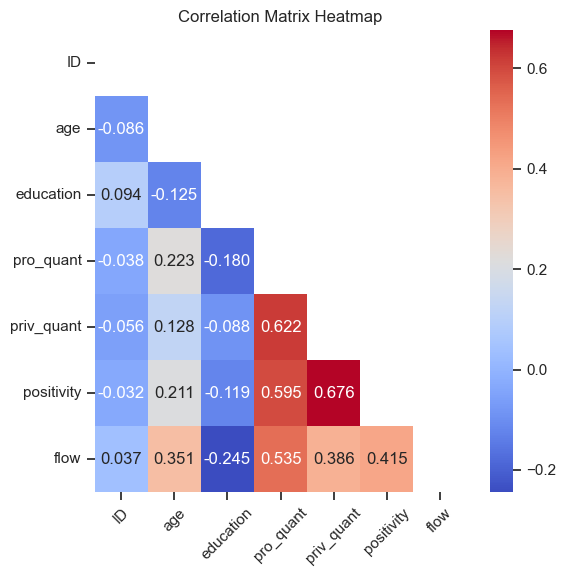

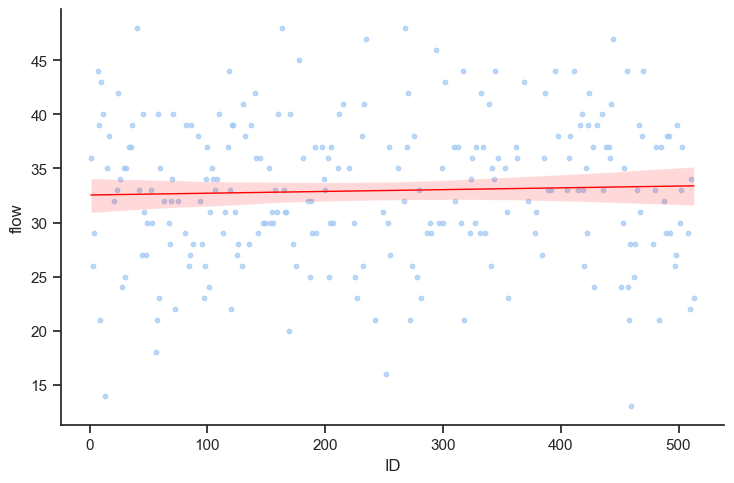

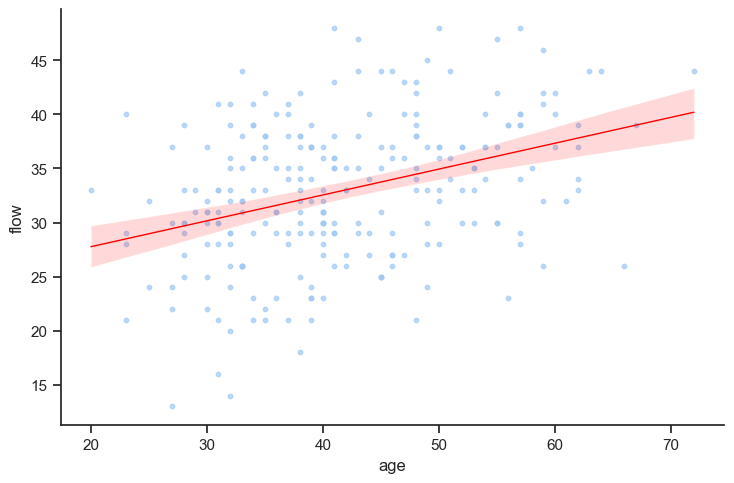

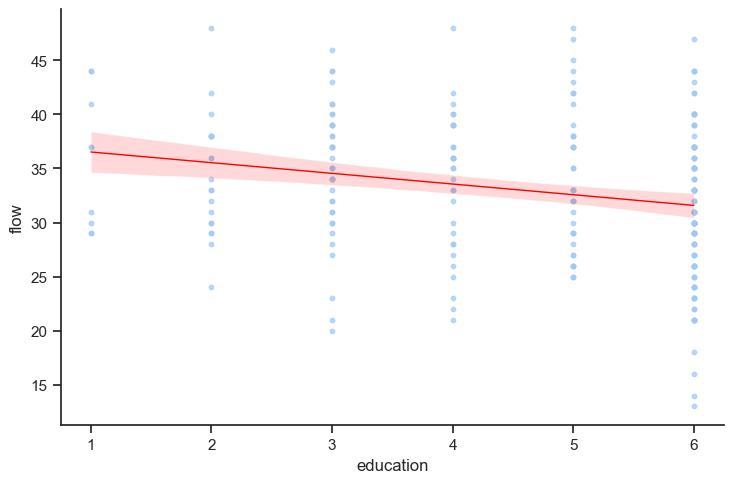

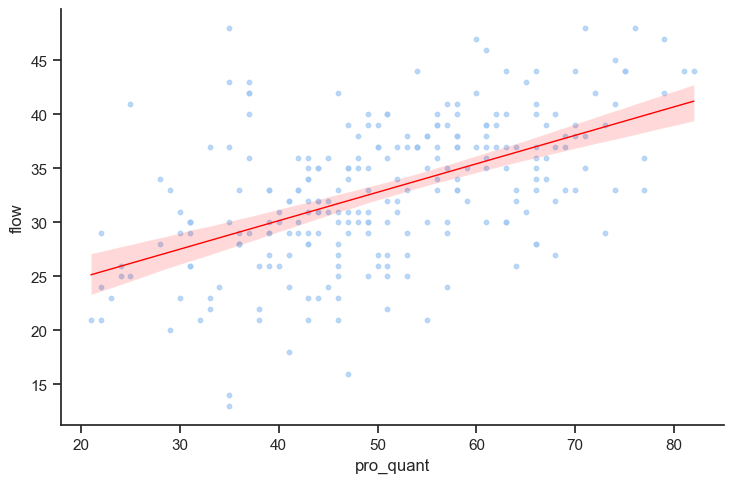

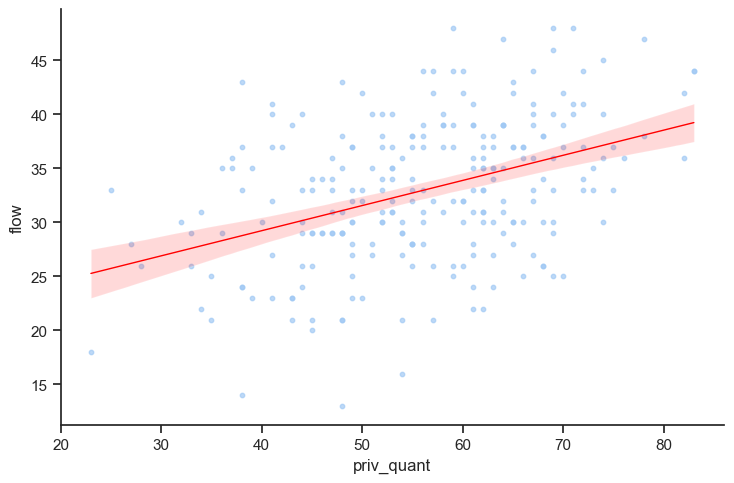

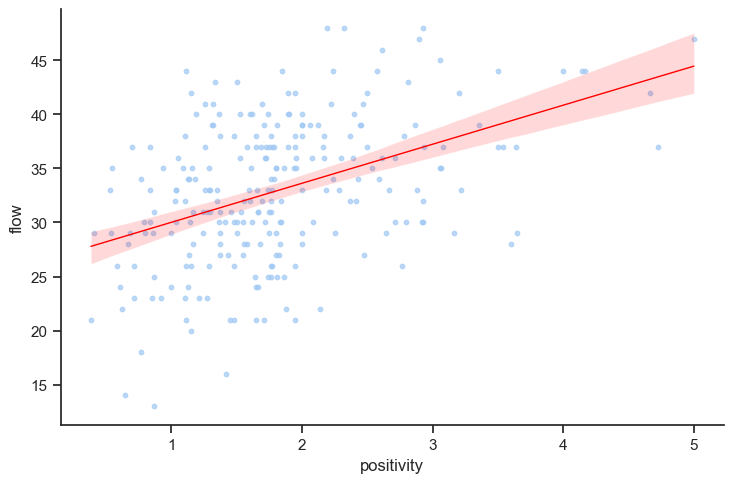

RMSE error: 5.317
RMSE/mean(Y): 0.161
R²: 0.333
R²adjusted: 0.257


C:\Users\romai\AppData\Local\Temp\ipykernel_20360\1616342563.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=y_train.name, inplace=True)
C:\Users\romai\AppData\Local\Temp\ipykernel_20360\1616342563.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=y_train.name, inplace=True)


In [146]:
from sklearn.neighbors import KNeighborsRegressor
KNNR_perf, KNNR_coef=LinearRegression_Step3(df,X_cols,y_cols,KNeighborsRegressor(n_neighbors=3))


In [147]:
"KNeighborsRegressor" in str(KNeighborsRegressor(n_neighbors=3))

True

In [148]:
perf_df=LR_perf.join(KNNR_perf)
display(perf_df)

LinearRegression()  KNeighborsRegressor(n_neighbors=3)
RMSE                    5.572429                            5.316850
RMSE/mean(Y)            0.169109                            0.161353
R²                      0.266951                            0.332651
R²adjusted              0.183650                            0.256816